In [1]:
# Necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import seaborn as sns

In [2]:
# Make DataFrame of xTB binding energies
raw_df = pd.read_csv("C:/Users/sophi/OneDrive - University of Leeds/Year 4/Sophie Blanch/code/xtb_energy/data/xtb_binding_energies.csv")
raw_df

Code  gibbs energy change / kJ mol no. of bonds no. of bonds to plot
0      AANF                           NaN            0                    0
1      AELQ                           NaN            3                    3
2      AEPC                           NaN            2                    2
3      AFKK                           NaN            2                    2
4      AFNQ                           NaN            2                    2
...     ...                           ...          ...                  ...
39722  LKKK                  -4866.700781            4                    4
39723  QKKK                  -4963.485681            2                    2
39724  NKKK                  -5011.929916            2                    2
39725  FKKK                  -5169.700443            2                    2
39726  KKKK                  -6525.548318            2                    2

[39727 rows x 4 columns]

In [3]:
# Drop NaN
df = raw_df.dropna()
df = df.drop(columns=['no. of bonds'])
df

Code  gibbs energy change / kJ mol no. of bonds to plot
1069   DDDD                   7187.782852                    3
1070   EEEE                   7139.435593                    4
1071   DEEE                   7041.246367                    4
1072   DEDE                   6925.061953                    4
1073   DDEE                   6591.780667                    5
...     ...                           ...                  ...
39722  LKKK                  -4866.700781                    4
39723  QKKK                  -4963.485681                    2
39724  NKKK                  -5011.929916                    2
39725  FKKK                  -5169.700443                    2
39726  KKKK                  -6525.548318                    2

[38658 rows x 3 columns]

In [4]:
# Define min and max values
min_value = df['gibbs energy change / kJ mol'].min()
max_value = df['gibbs energy change / kJ mol'].max()

In [5]:
# Calculate range
range = max_value - min_value
print(range)

13713.331170000001


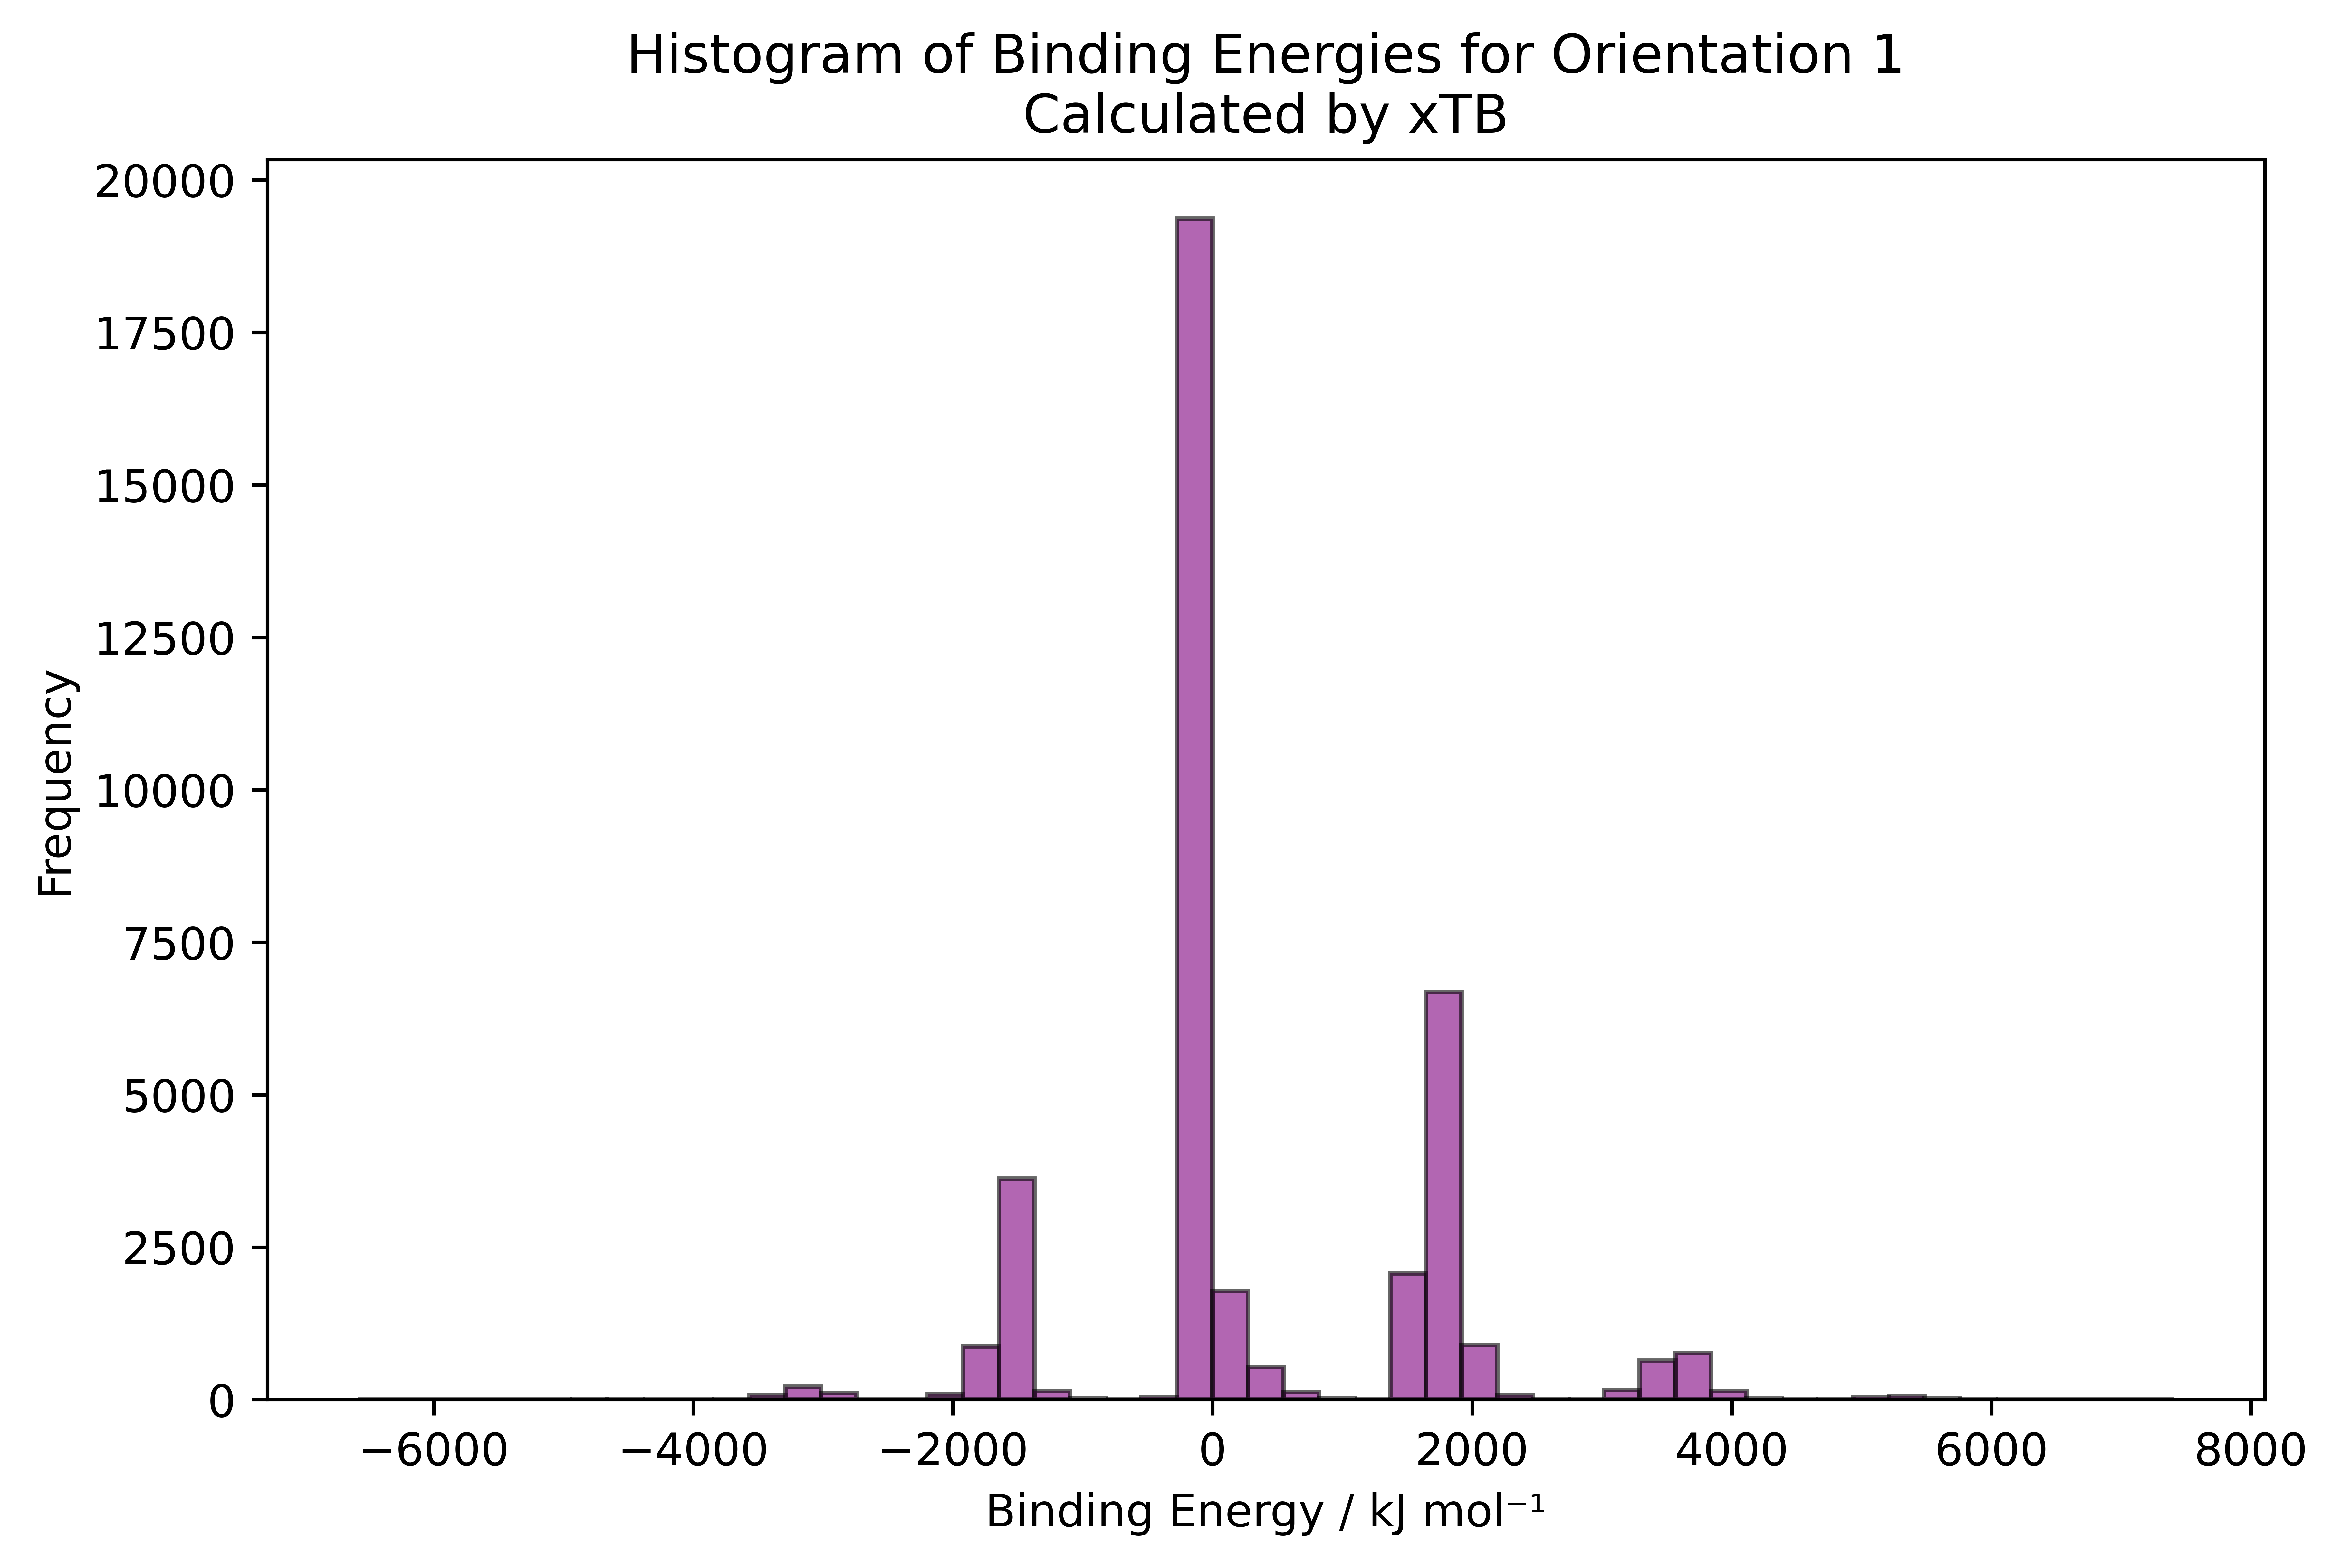

In [6]:
# Define the number of bins
num_bins = 50   

# Calculate bin width
bin_width = (max_value - min_value) / num_bins

# Generate bin edges ensuring 0 is a boundary
start_bin = min_value - (min_value % bin_width)   
bins = np.arange(start_bin, max_value + bin_width, bin_width)

# Ensure 0 is a bin edge
if 0 not in bins:
    bins = np.append(bins, 0)
    bins = np.sort(bins)   

# Plot histogram
plt.figure(figsize=(8, 5), dpi=1000)
plt.hist(df['gibbs energy change / kJ mol'], bins=bins, color='purple', alpha=0.6, edgecolor='black')
plt.xlabel('Binding Energy / kJ mol⁻¹')
plt.ylabel('Frequency')
plt.title('Histogram of Binding Energies for Orientation 1\nCalculated by xTB')
plt.rcParams['font.family'] = 'Times New Roman'
plt.savefig("C:/Users/sophi/OneDrive - University of Leeds/Year 4/Sophie Blanch/Report/images/xtb_orientation_1_hist.png", dpi=1000, bbox_inches='tight')

# Uncomment to see the rough regions of binding energy clusters
# plt.axvline(x=-700, color='black', linestyle='dashed', linewidth=1)
# plt.axvline(x=1200, color='black', linestyle='dashed', linewidth=1)
# plt.axvline(x=-2400, color='black', linestyle='dashed', linewidth=1)
# plt.axvline(x=2900, color='black', linestyle='dashed', linewidth=1)
# plt.axvline(x=-3900, color='black', linestyle='dashed', linewidth=1)

# Show the plot
plt.show()

C:\Users\sophi\AppData\Local\Temp\ipykernel_21964\1732214230.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Amino Acid', y='Average Binding Energy', data=avg_energy_df, palette='viridis', edgecolor='black')


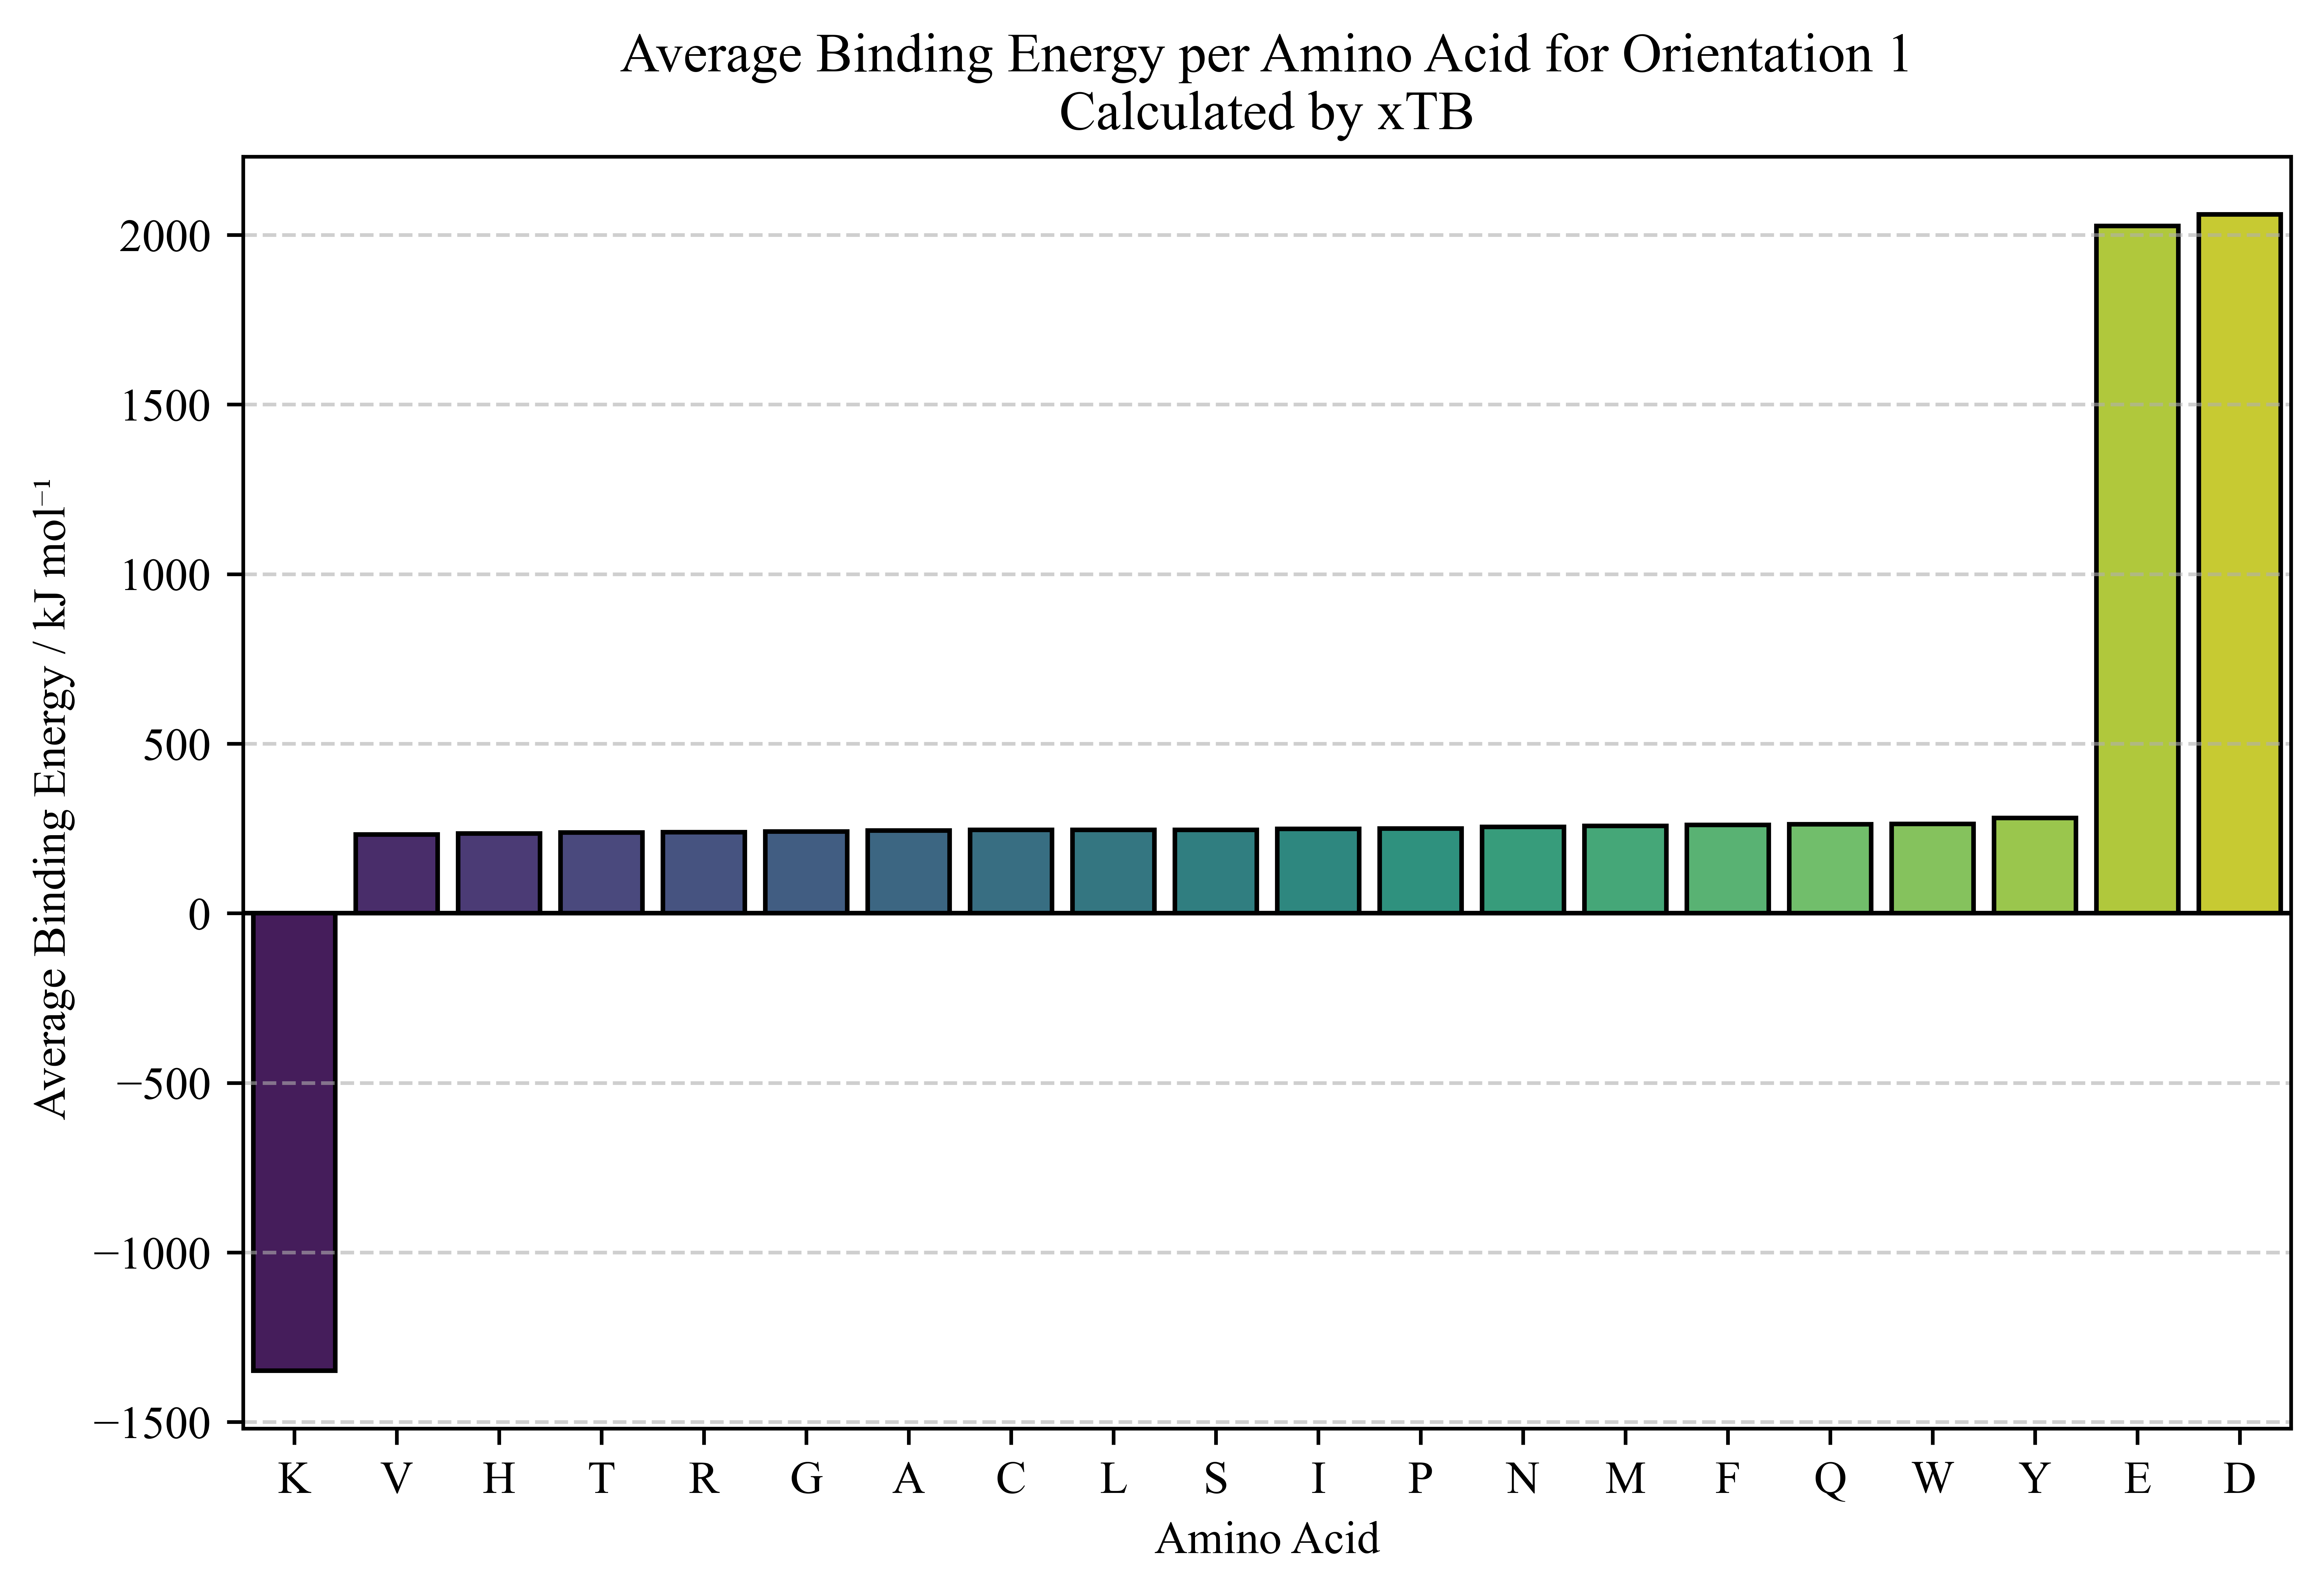

In [7]:
# Dictionary to store summed energies and counts for each amino acid
amino_energy_sum = defaultdict(float)
amino_count = defaultdict(int)

# Process each row in the DataFrame
for _, row in df.iterrows():
    peptide = row['Code']   
    energy = row['gibbs energy change / kJ mol']   

    # Distribute energy equally among amino acids in the peptide
    for amino in peptide:
        amino_energy_sum[amino] += energy   
        amino_count[amino] += 1   

# Compute average energy per amino acid
amino_avg_energy = {aa: amino_energy_sum[aa] / amino_count[aa] for aa in amino_energy_sum}

# Convert to DataFrame for plotting
avg_energy_df = pd.DataFrame(amino_avg_energy.items(), columns=['Amino Acid', 'Average Binding Energy'])
avg_energy_df = avg_energy_df.sort_values(by='Average Binding Energy')   # Sort

# Plot the bar chart
plt.figure(figsize=(8, 5), dpi=1000)
sns.barplot(x='Amino Acid', y='Average Binding Energy', data=avg_energy_df, palette='viridis', edgecolor='black')

plt.xlabel("Amino Acid")
plt.ylabel("Average Binding Energy / kJ mol⁻¹ ")
plt.title("Average Binding Energy per Amino Acid for Orientation 1\nCalculated by xTB")
plt.axhline(y=0, color='black', linestyle='-', linewidth=1)
plt.rcParams['font.family'] = 'Times New Roman'

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.savefig("C:/Users/sophi/OneDrive - University of Leeds/Year 4/Sophie Blanch/Report/images/xtb_avg_binding_per_aa_1_hist.png", dpi=1000, bbox_inches='tight')


plt.show()

In [51]:
# Defining central cluster of data
upper_bound = 1200
lower_bound = -700

count_in_range = df[(df['gibbs energy change / kJ mol'] >= lower_bound) & (df['gibbs energy change / kJ mol'] <= upper_bound)].shape[0]


print(f"Percentage of data in central cluster: {(count_in_range*100)/38658}%")

Percentage of data in central cluster: 56.591132495214445%


       Code  gibbs energy change / kJ mol  no. of bonds to plot
12670  LWQW                   1000.475438                     1
12671  GMVF                    997.831003                     1
12672  SYCN                    994.683336                     2
12673  TYYN                    992.156969                     3
12674  VYQW                    985.482299                     1
...     ...                           ...                   ...
34542  VECK                   -329.452450                     4
34543  DKCW                   -343.819464                     4
34544  ERKR                   -359.334483                     3
34545  EKRC                   -435.757812                     4
34546  ERKC                   -482.878996                     2

[21877 rows x 3 columns]


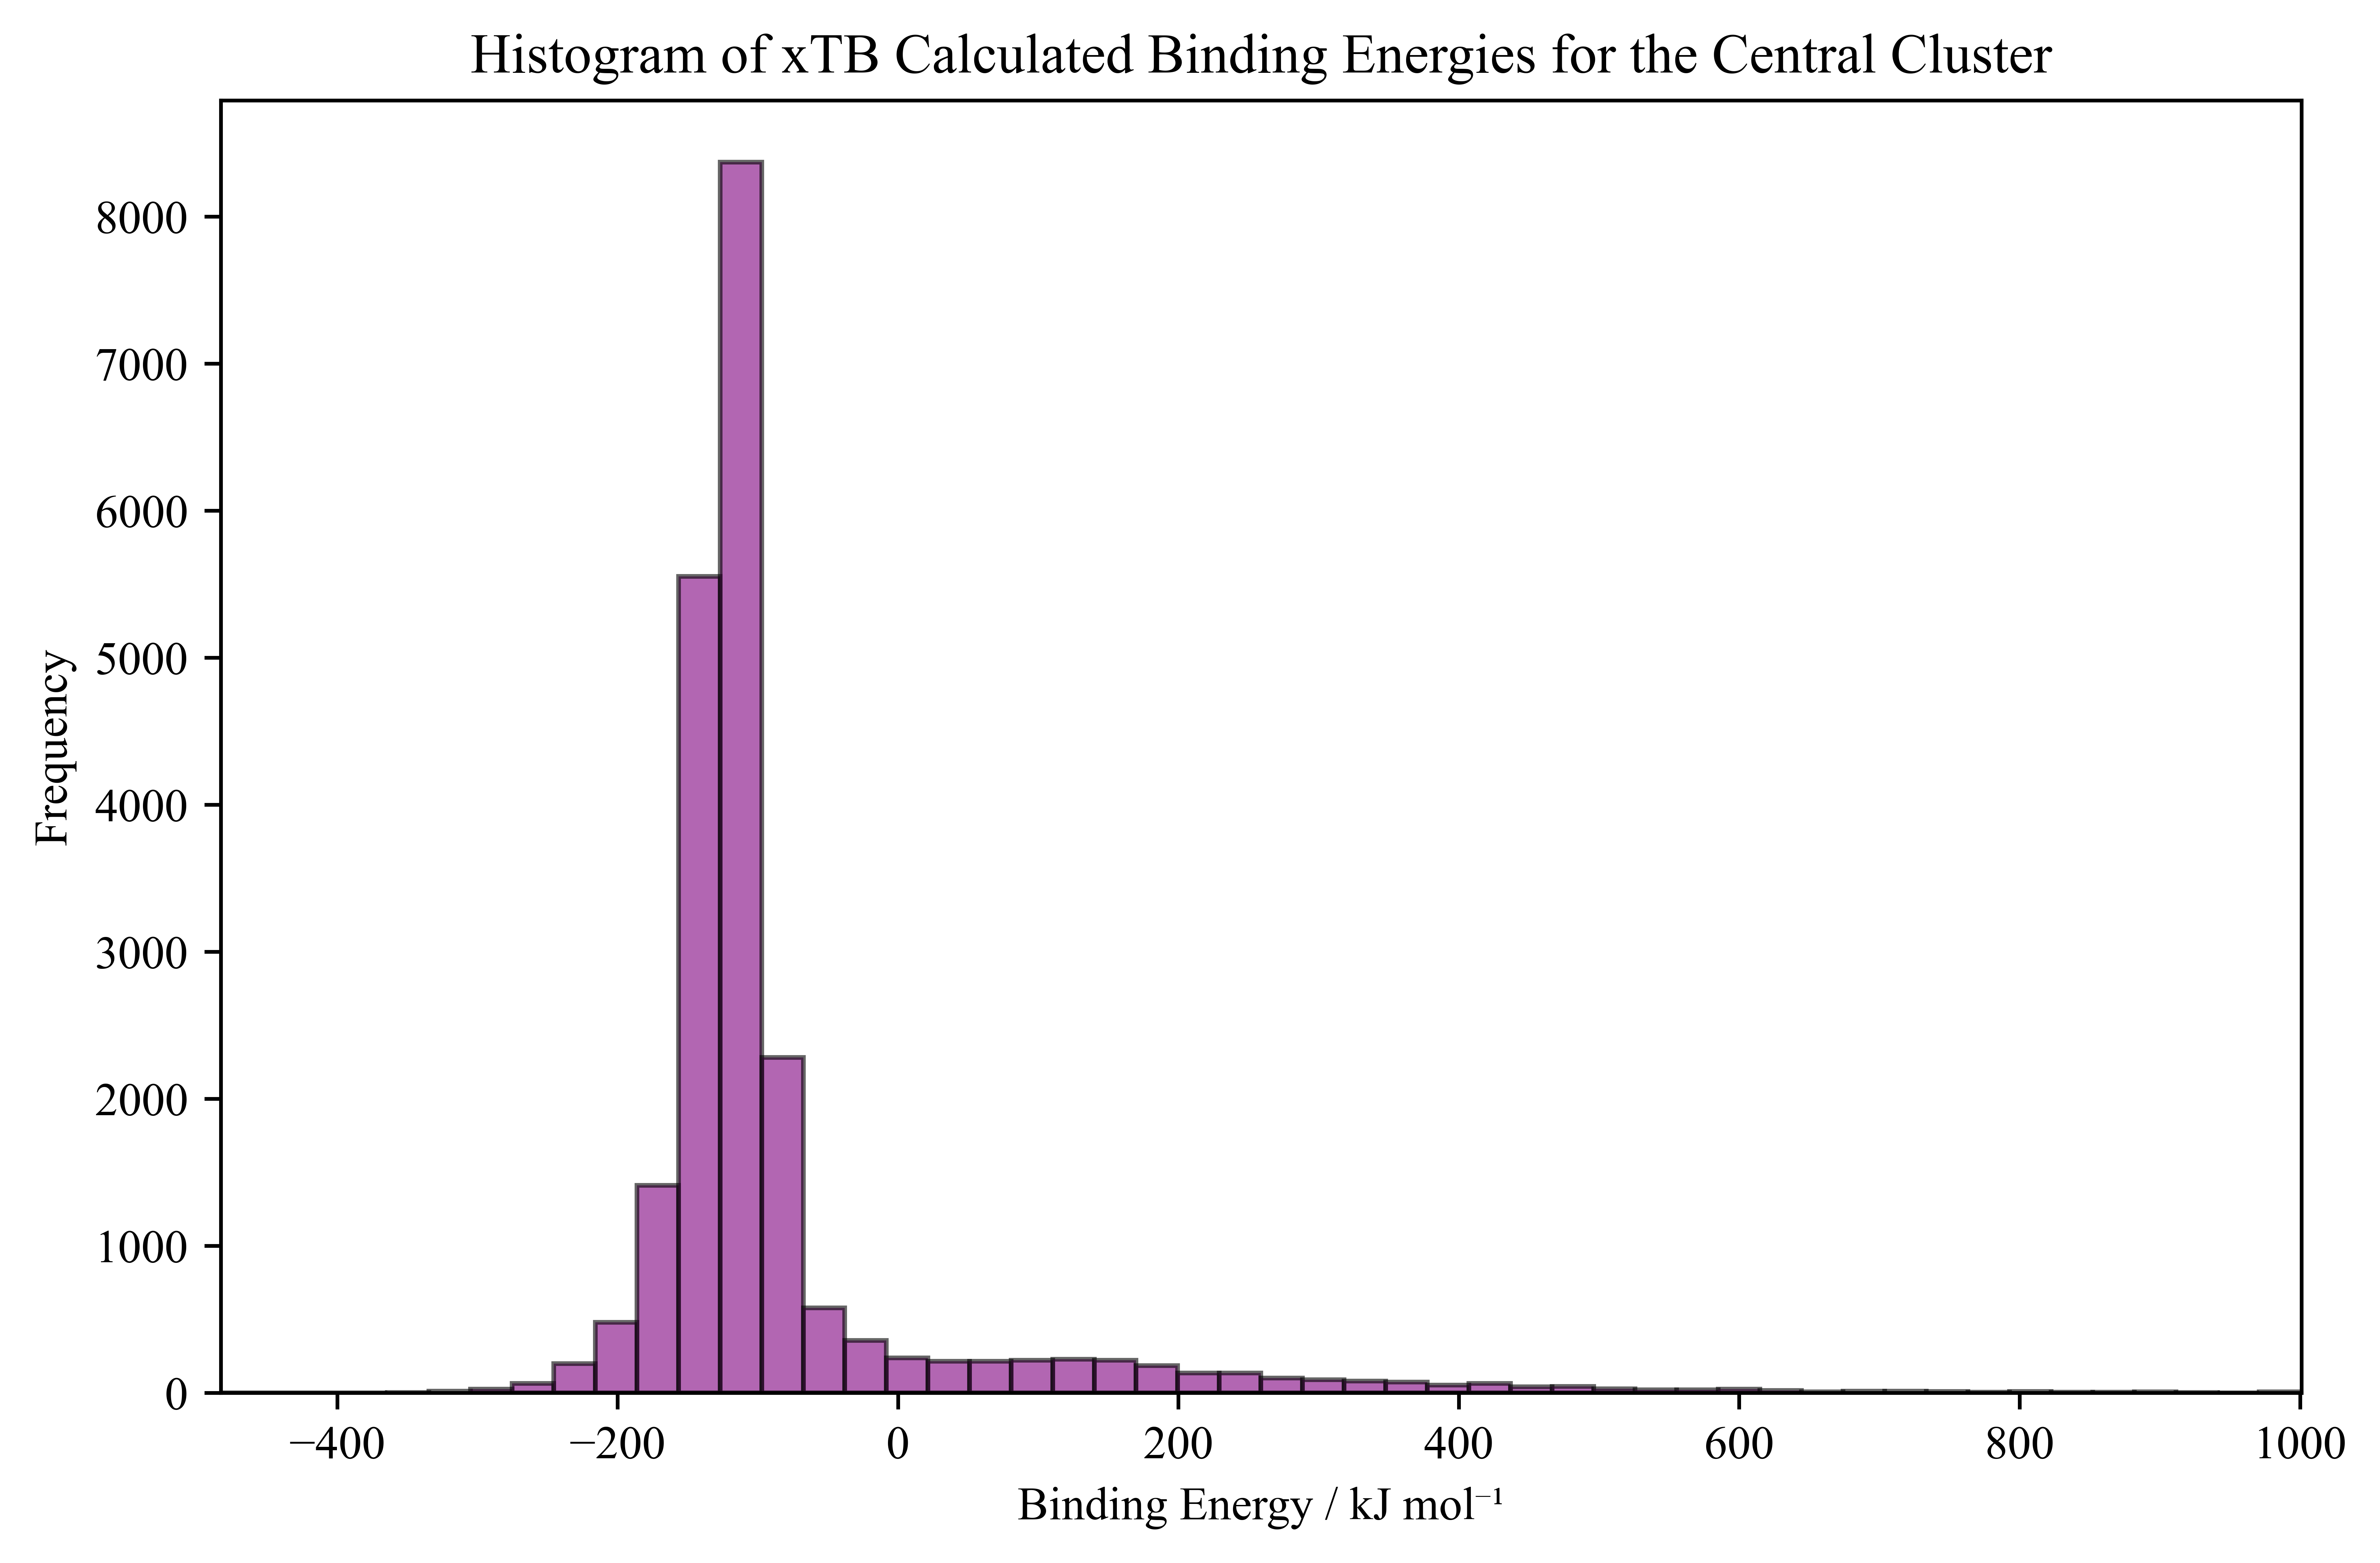

In [26]:
df_edited = df[(df['gibbs energy change / kJ mol'] >= -483) & (df['gibbs energy change / kJ mol'] <= 1001)]
print(df_edited)


# Plot histogram
plt.figure(figsize=(8, 5), dpi=1000)
plt.hist(df_edited['gibbs energy change / kJ mol'], bins=50, color='purple', alpha=0.6, edgecolor='black')
plt.xlabel('Binding Energy / kJ mol⁻¹')
plt.xlim(-483, 1001)
plt.ylabel('Frequency')
plt.title('Histogram of xTB Calculated Binding Energies for the Central Cluster')
plt.rcParams['font.family'] = 'Times New Roman'
plt.savefig("C:/Users/sophi/OneDrive - University of Leeds/Year 4/Sophie Blanch/Report/images/xtb_central_cluster_BE_hist.png", dpi=1000, bbox_inches='tight')


# Show the plot
plt.show()

C:\Users\sophi\AppData\Local\Temp\ipykernel_21964\3263944689.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Amino Acid', y='Average Binding Energy', data=avg_energy_df, palette='viridis', edgecolor='black')


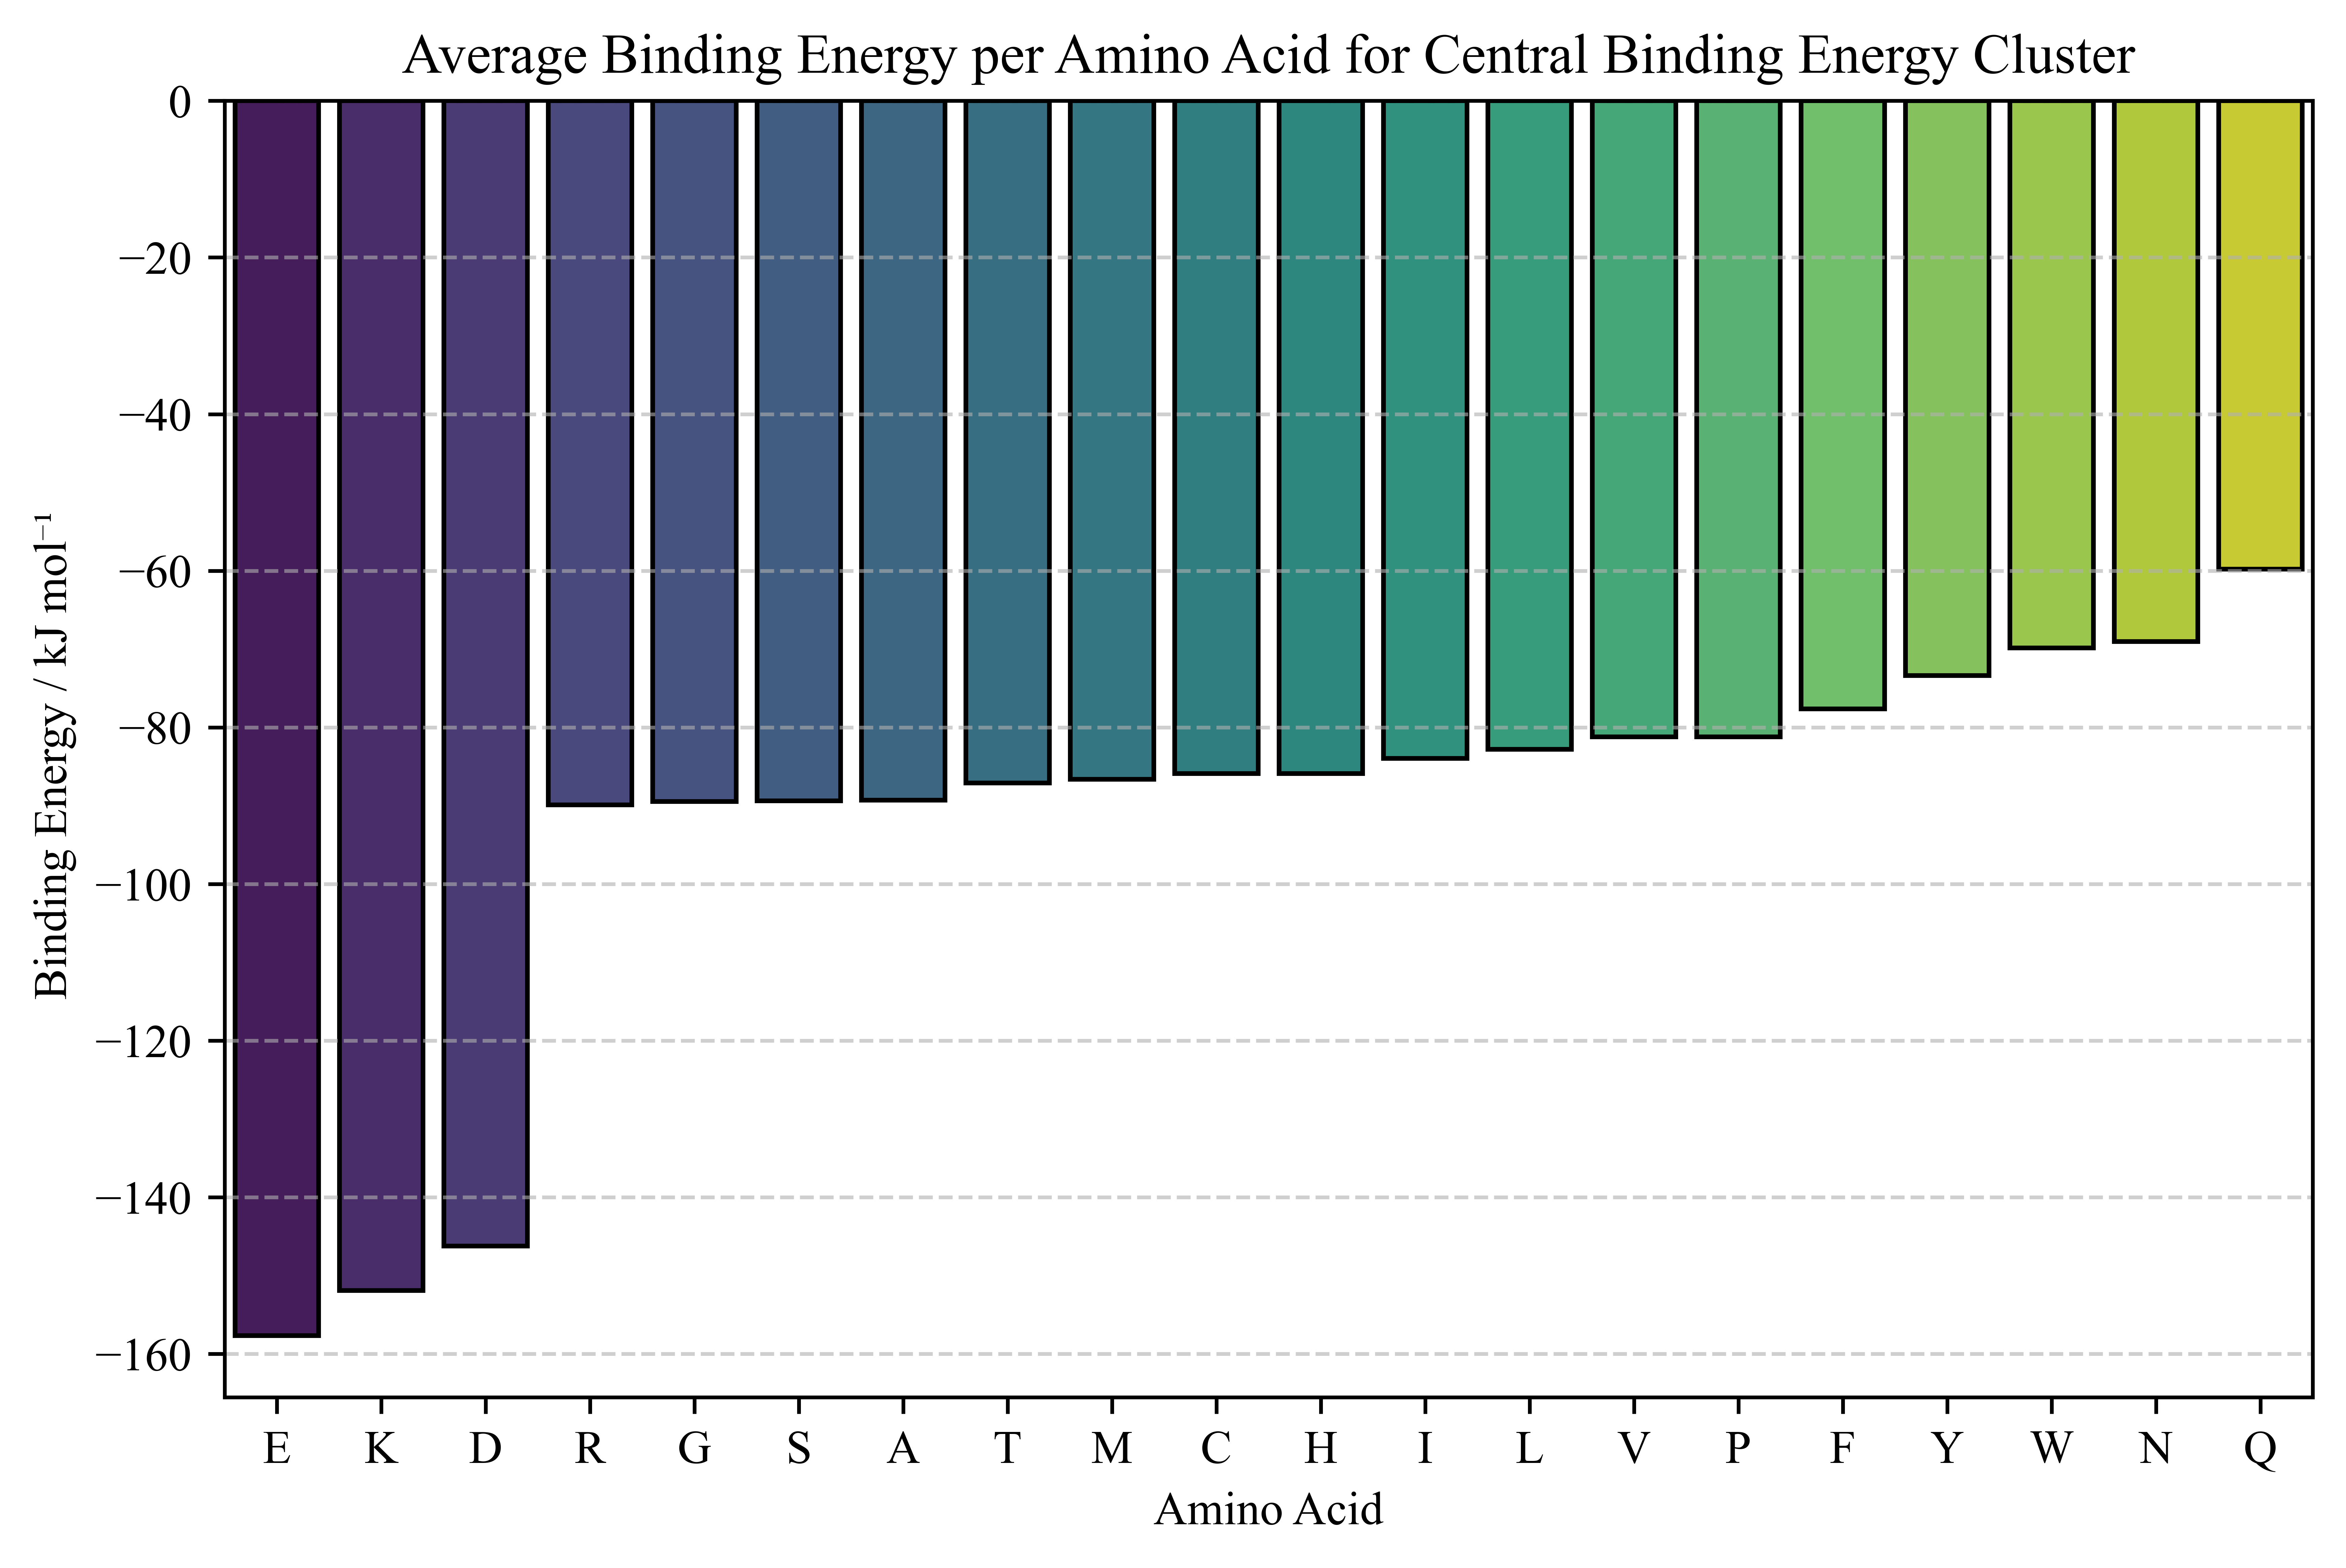

In [27]:
# Dictionary to store summed energies and counts for each amino acid
amino_energy_sum = defaultdict(float)
amino_count = defaultdict(int)

# Process each row in the DataFrame
for _, row in df_edited.iterrows():
    peptide = row['Code']   
    energy = row['gibbs energy change / kJ mol']   

    # Distribute energy equally among amino acids in the peptide
    for amino in peptide:
        amino_energy_sum[amino] += energy   
        amino_count[amino] += 1   

# Compute average energy per amino acid
amino_avg_energy = {aa: amino_energy_sum[aa] / amino_count[aa] for aa in amino_energy_sum}

# Convert to DataFrame for plotting
avg_energy_df = pd.DataFrame(amino_avg_energy.items(), columns=['Amino Acid', 'Average Binding Energy'])
avg_energy_df = avg_energy_df.sort_values(by='Average Binding Energy')   # Sort

# Plot the bar chart
plt.figure(figsize=(8, 5), dpi=1000)
sns.barplot(x='Amino Acid', y='Average Binding Energy', data=avg_energy_df, palette='viridis', edgecolor='black')

plt.xlabel("Amino Acid")
plt.ylabel("Binding Energy / kJ mol⁻¹ ")
plt.title("Average Binding Energy per Amino Acid for Central Binding Energy Cluster")
plt.rcParams['font.family'] = 'Times New Roman'

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.savefig("C:/Users/sophi/OneDrive - University of Leeds/Year 4/Sophie Blanch/Report/images/xtb_avg_binding_per_aa_1_centre_hist.png", dpi=1000, bbox_inches='tight')


plt.show()

In [28]:
df['no. of bonds to plot'] = df['no. of bonds to plot'].astype(int)

# Filter for tetrahedral complexes
df_filtered = df[df['no. of bonds to plot'] == 4]

# Display the filtered DataFrame
print(df_filtered)

       Code  gibbs energy change / kJ mol  no. of bonds to plot
1070   EEEE                   7139.435593                     4
1071   DEEE                   7041.246367                     4
1072   DEDE                   6925.061953                     4
1075   VEDE                   6017.163091                     4
1078   GEED                   5937.232003                     4
...     ...                           ...                   ...
39708  CKRK                  -3650.517526                     4
39709  LKCK                  -3670.363563                     4
39710  SCKK                  -3681.294054                     4
39714  MKKK                  -4350.872128                     4
39722  LKKK                  -4866.700781                     4

[22504 rows x 3 columns]


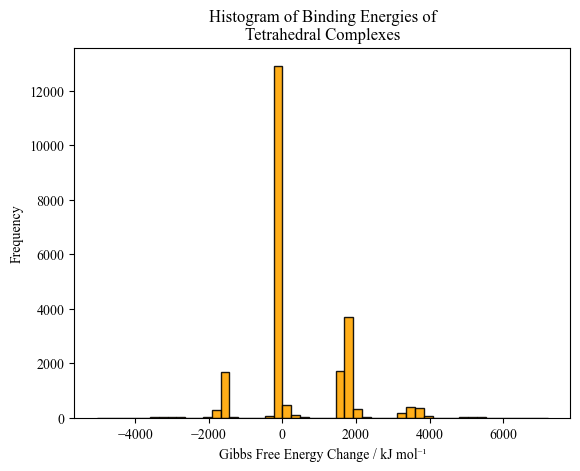

In [29]:
# Whole data set Tetrahedral binding energies
min_value = df_filtered['gibbs energy change / kJ mol'].min()
max_value = df_filtered['gibbs energy change / kJ mol'].max()

# Define the number of bins
num_bins = 50   

# Calculate bin width
bin_width = (max_value - min_value) / num_bins

# Generate bin edges ensuring 0 is a boundary
start_bin = min_value - (min_value % bin_width)   
bins = np.arange(start_bin, max_value + bin_width, bin_width)

# Ensure 0 is a bin edge
if 0 not in bins:
    bins = np.append(bins, 0)
    bins = np.sort(bins)   

# Plot histogram
plt.hist(df_filtered['gibbs energy change / kJ mol'], bins=bins, color='orange', alpha=0.9, edgecolor='black')
plt.xlabel('Gibbs Free Energy Change / kJ mol⁻¹')
plt.ylabel('Frequency')
plt.title('Histogram of Binding Energies of\nTetrahedral Complexes')
plt.rcParams['font.family'] = 'Times New Roman'

# Show the plot
plt.show()

In [31]:
df_edited['no. of bonds to plot'] = df_edited['no. of bonds to plot'].astype(int)

# Create new dataframe for tetrahedral complexes within central cluster
df_edited_filtered = df_edited[df_edited['no. of bonds to plot'] == 4]

# Display the filtered DataFrame
print(df_edited_filtered)

       Code  gibbs energy change / kJ mol  no. of bonds to plot
12670  LWQW                   1000.475438                     1
12671  GMVF                    997.831003                     1
12672  SYCN                    994.683336                     2
12673  TYYN                    992.156969                     3
12674  VYQW                    985.482299                     1
...     ...                           ...                   ...
34542  VECK                   -329.452450                     4
34543  DKCW                   -343.819464                     4
34544  ERKR                   -359.334483                     3
34545  EKRC                   -435.757812                     4
34546  ERKC                   -482.878996                     2

[21877 rows x 3 columns]
       Code  gibbs energy change / kJ mol  no. of bonds to plot
12675  THQQ                    981.140897                     4
12678  AAYQ                    937.733644                     4
12701  INFQ   

C:\Users\sophi\AppData\Local\Temp\ipykernel_21964\3525927975.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_edited['no. of bonds to plot'] = df_edited['no. of bonds to plot'].astype(int)


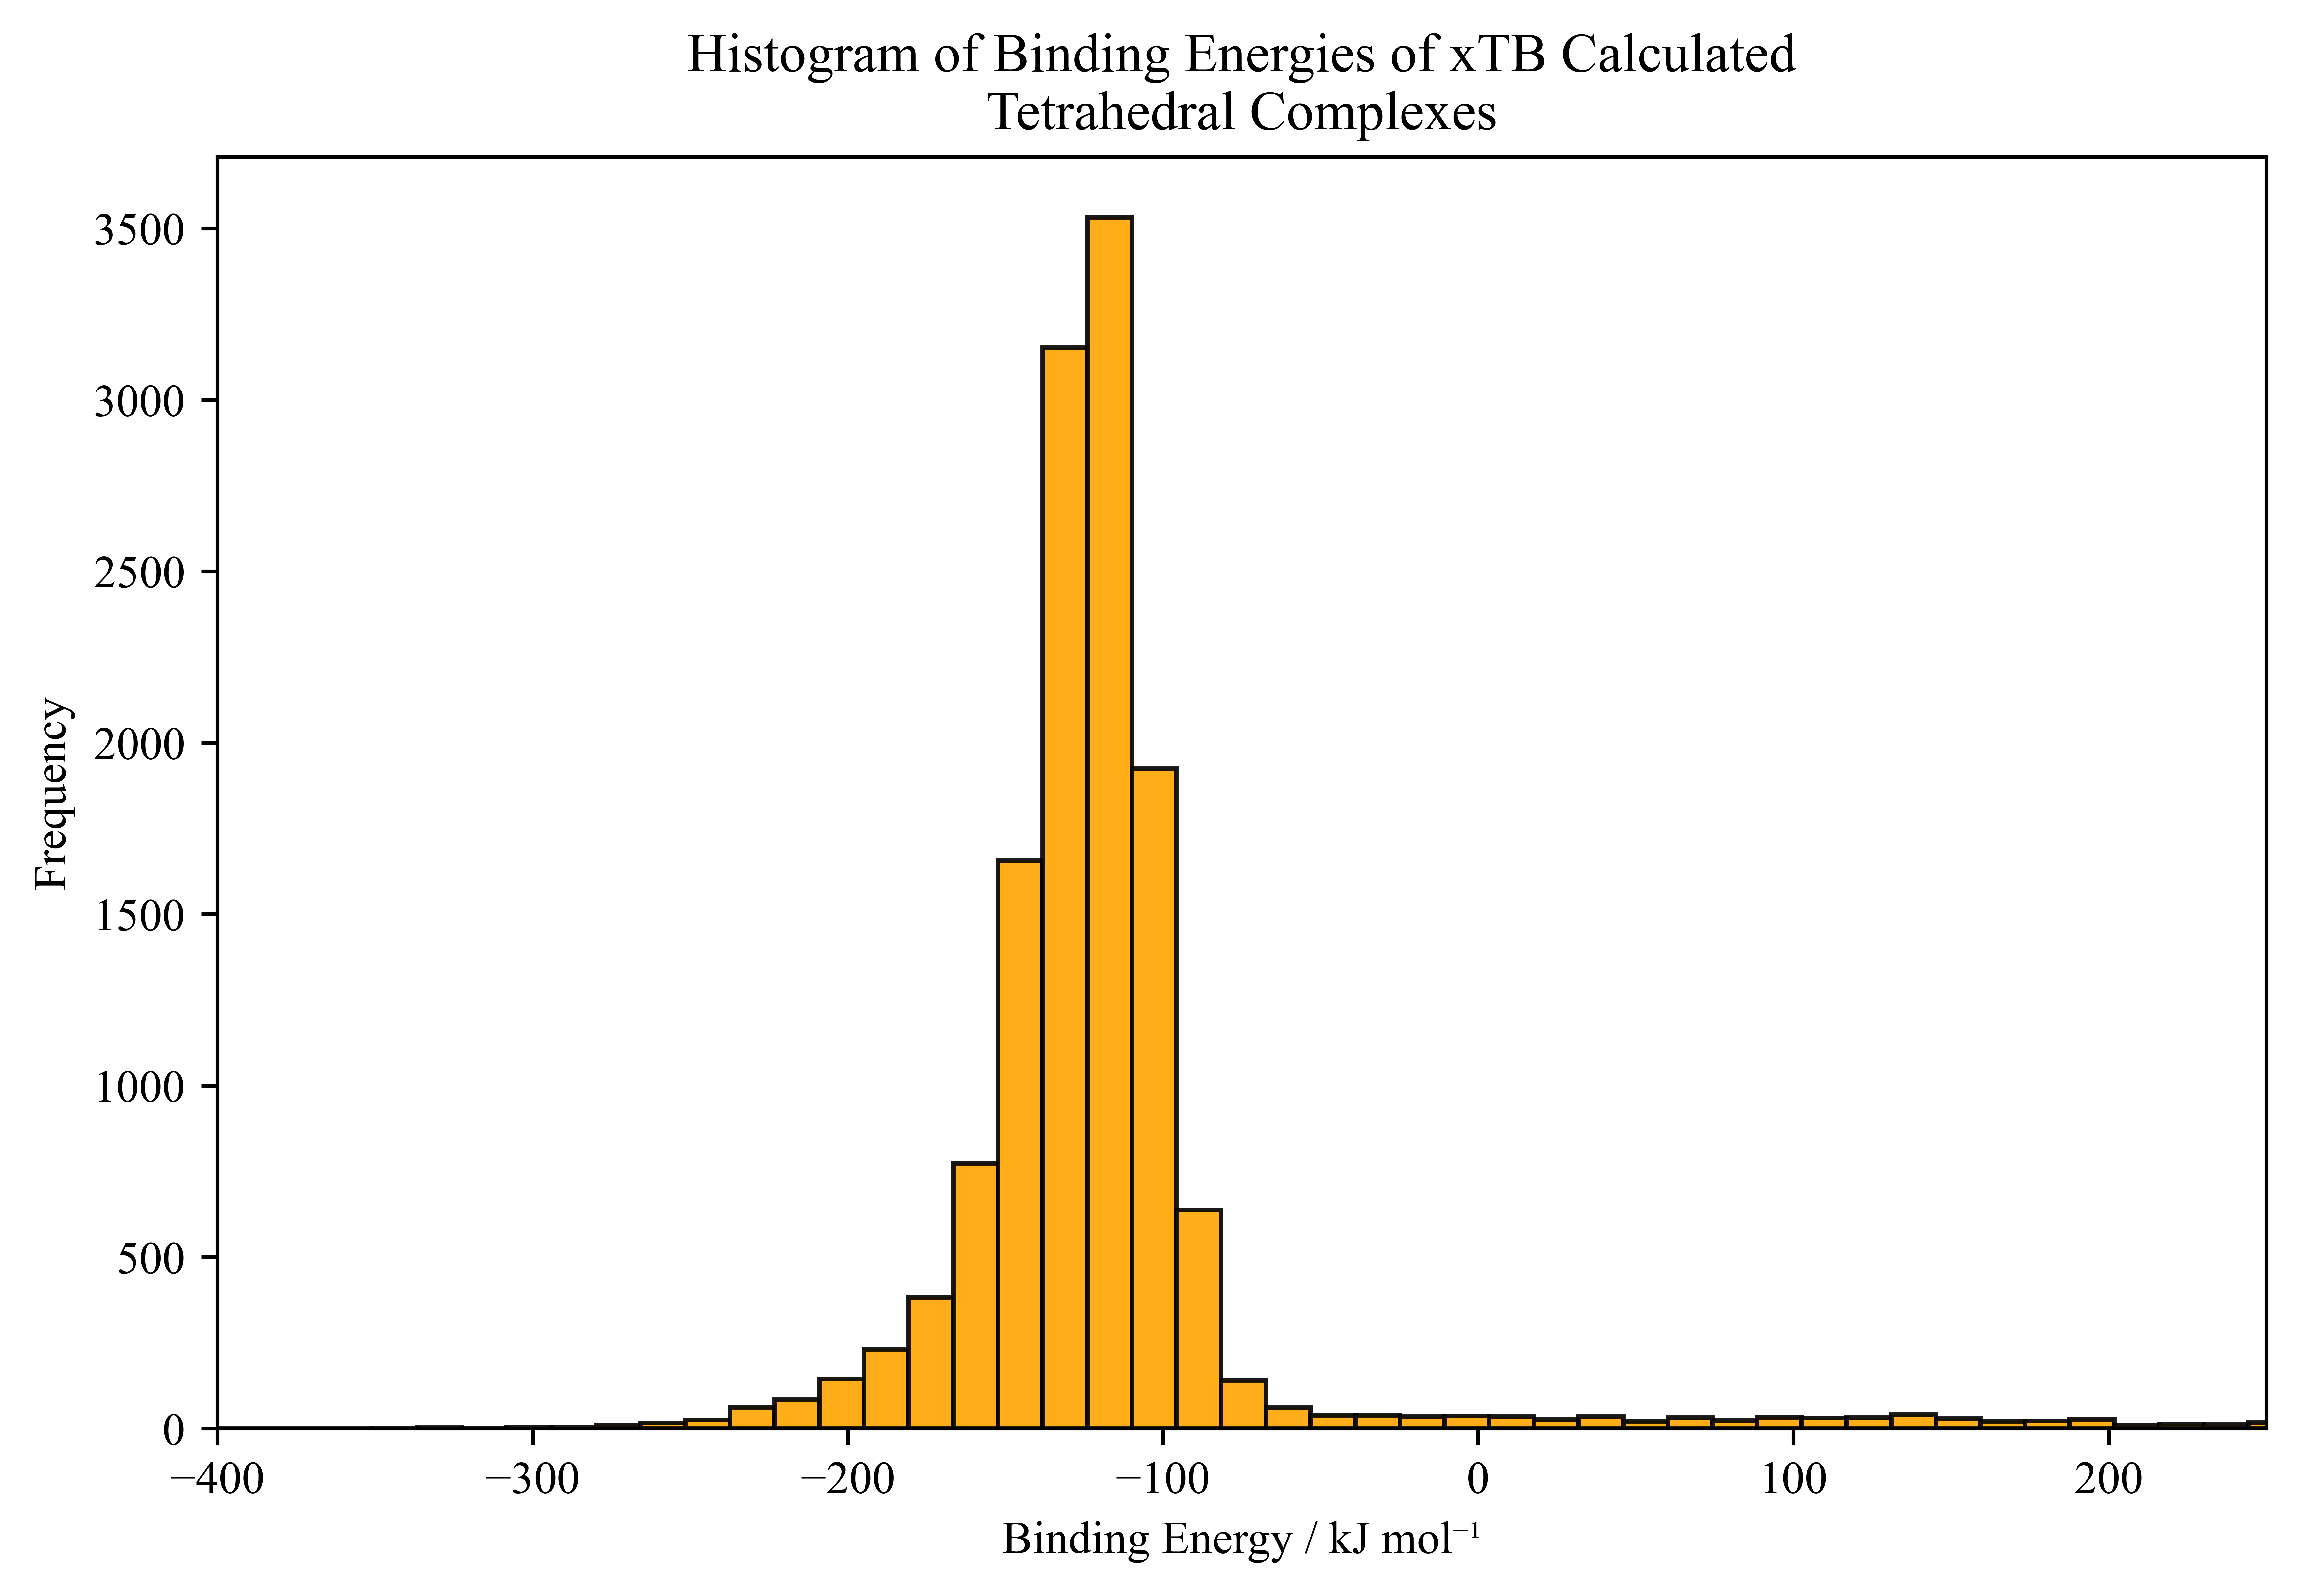

In [32]:
# Define min and max values
min_value = df_edited_filtered['gibbs energy change / kJ mol'].min()
max_value = df_edited_filtered['gibbs energy change / kJ mol'].max()

# Define the number of bins
num_bins = 50   

# Calculate bin width
bin_width = (max_value - min_value) / num_bins

# Generate bin edges ensuring 0 is a boundary
start_bin = min_value - (min_value % bin_width)   
bins = np.arange(start_bin, max_value + bin_width, bin_width)

# Ensure 0 is a bin edge
if 0 not in bins:
    bins = np.append(bins, 0)
    bins = np.sort(bins)   

# Plot histogram
plt.figure(figsize=(8, 5), dpi=1000)
plt.hist(df_edited_filtered['gibbs energy change / kJ mol'], bins=100, color='orange', alpha=0.9, edgecolor='black')
plt.xlabel('Binding Energy / kJ mol⁻¹')
plt.xlim(-400, 250)
plt.ylabel('Frequency')
plt.title('Histogram of Binding Energies of xTB Calculated\nTetrahedral Complexes')
plt.rcParams['font.family'] = 'Times New Roman'
plt.savefig("C:/Users/sophi/OneDrive - University of Leeds/Year 4/Sophie Blanch/Report/images/xtb_tetrahedral_BE_1_hist.png", dpi=1000, bbox_inches='tight')

# Show the plot
plt.show()

C:\Users\sophi\AppData\Local\Temp\ipykernel_21964\1024619939.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Amino Acid', y='Average Binding Energy', data=avg_energy_df, palette='viridis', edgecolor='black')


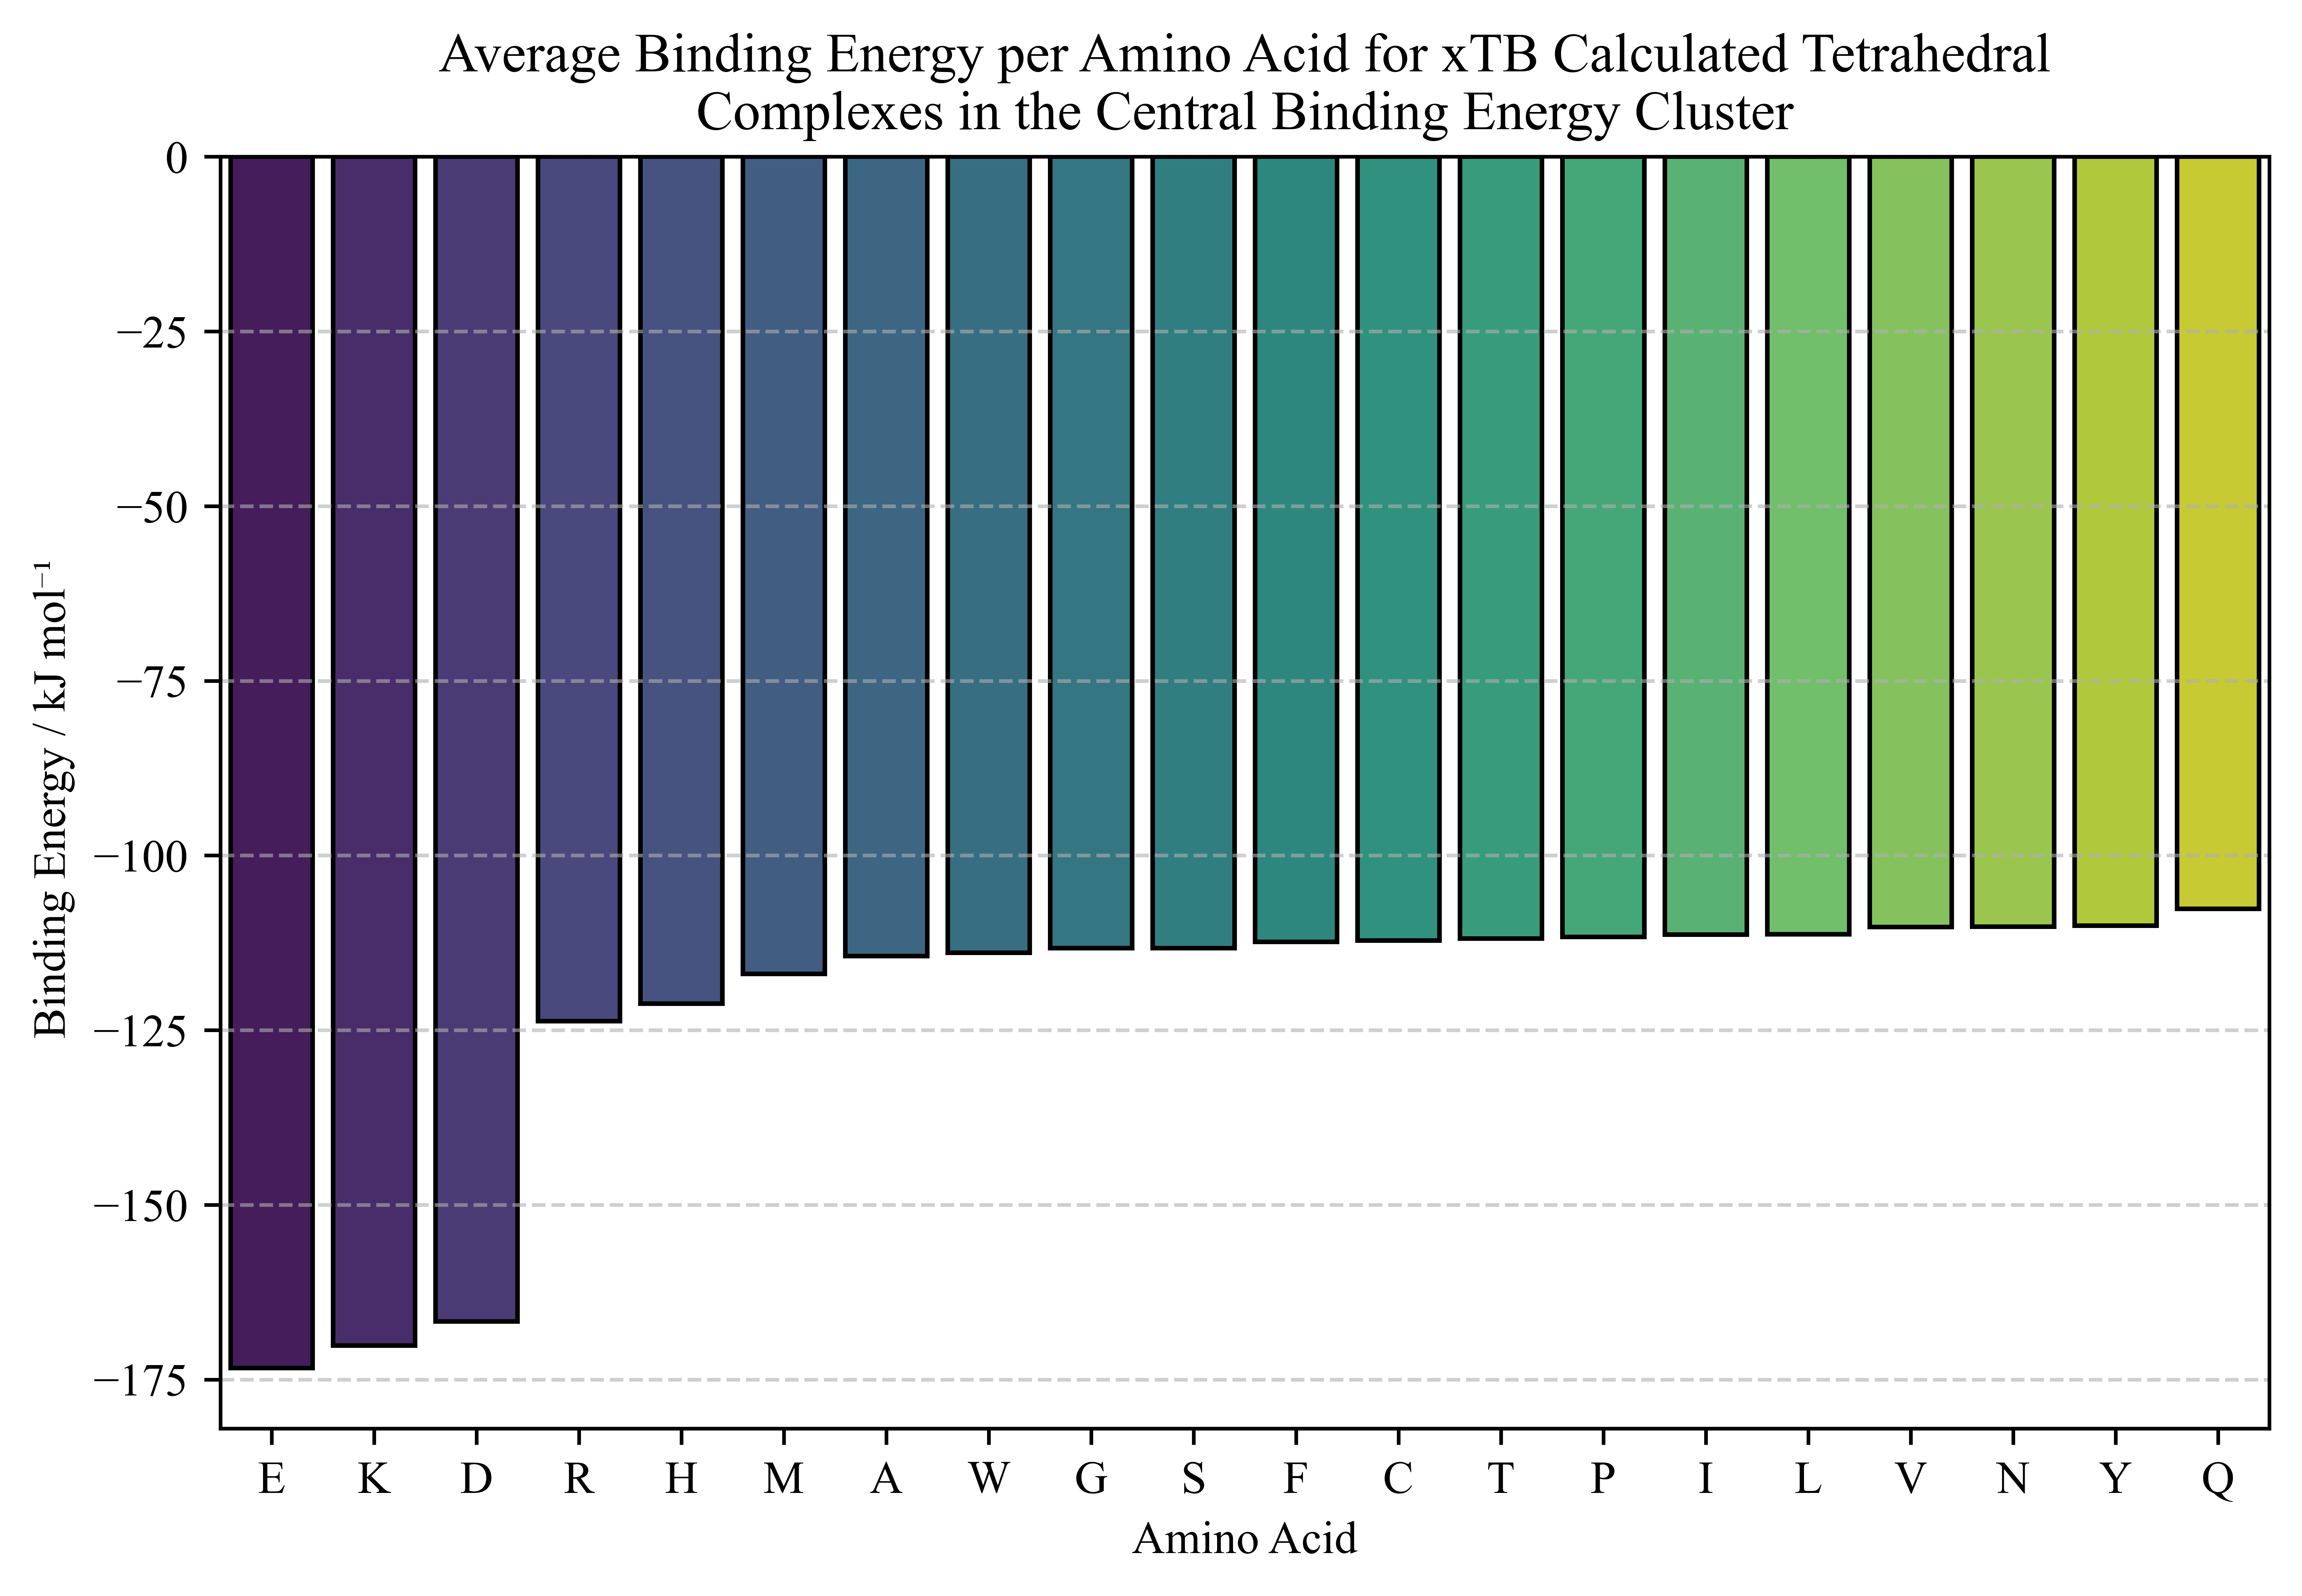

In [33]:
# Dictionary to store summed energies and counts for each amino acid
amino_energy_sum = defaultdict(float)
amino_count = defaultdict(int)

# Process each row in the DataFrame
for _, row in df_edited_filtered.iterrows():
    peptide = row['Code']   
    energy = row['gibbs energy change / kJ mol']   

    # Distribute energy equally among amino acids in the peptide
    for amino in peptide:
        amino_energy_sum[amino] += energy   
        amino_count[amino] += 1   

# Compute average energy per amino acid
amino_avg_energy = {aa: amino_energy_sum[aa] / amino_count[aa] for aa in amino_energy_sum}

# Convert to DataFrame for plotting
avg_energy_df = pd.DataFrame(amino_avg_energy.items(), columns=['Amino Acid', 'Average Binding Energy'])
avg_energy_df = avg_energy_df.sort_values(by='Average Binding Energy')   # Sort

# Plot the bar chart
plt.figure(figsize=(8, 5), dpi=1000)
sns.barplot(x='Amino Acid', y='Average Binding Energy', data=avg_energy_df, palette='viridis', edgecolor='black')

plt.xlabel("Amino Acid")
plt.ylabel("Binding Energy / kJ mol⁻¹ ")
plt.title("Average Binding Energy per Amino Acid for xTB Calculated Tetrahedral\nComplexes in the Central Binding Energy Cluster")
plt.rcParams['font.family'] = 'Times New Roman'

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.savefig("C:/Users/sophi/OneDrive - University of Leeds/Year 4/Sophie Blanch/Report/images/xtb_avg_binding_per_aa_1_centre_tetrahedral_hist.png", dpi=1000, bbox_inches='tight')


plt.show()

C:\Users\sophi\AppData\Local\Temp\ipykernel_21964\2975142122.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='no. of bonds to plot', y='gibbs energy change / kJ mol', data=avg_energy_bonds, palette='viridis', edgecolor='black')


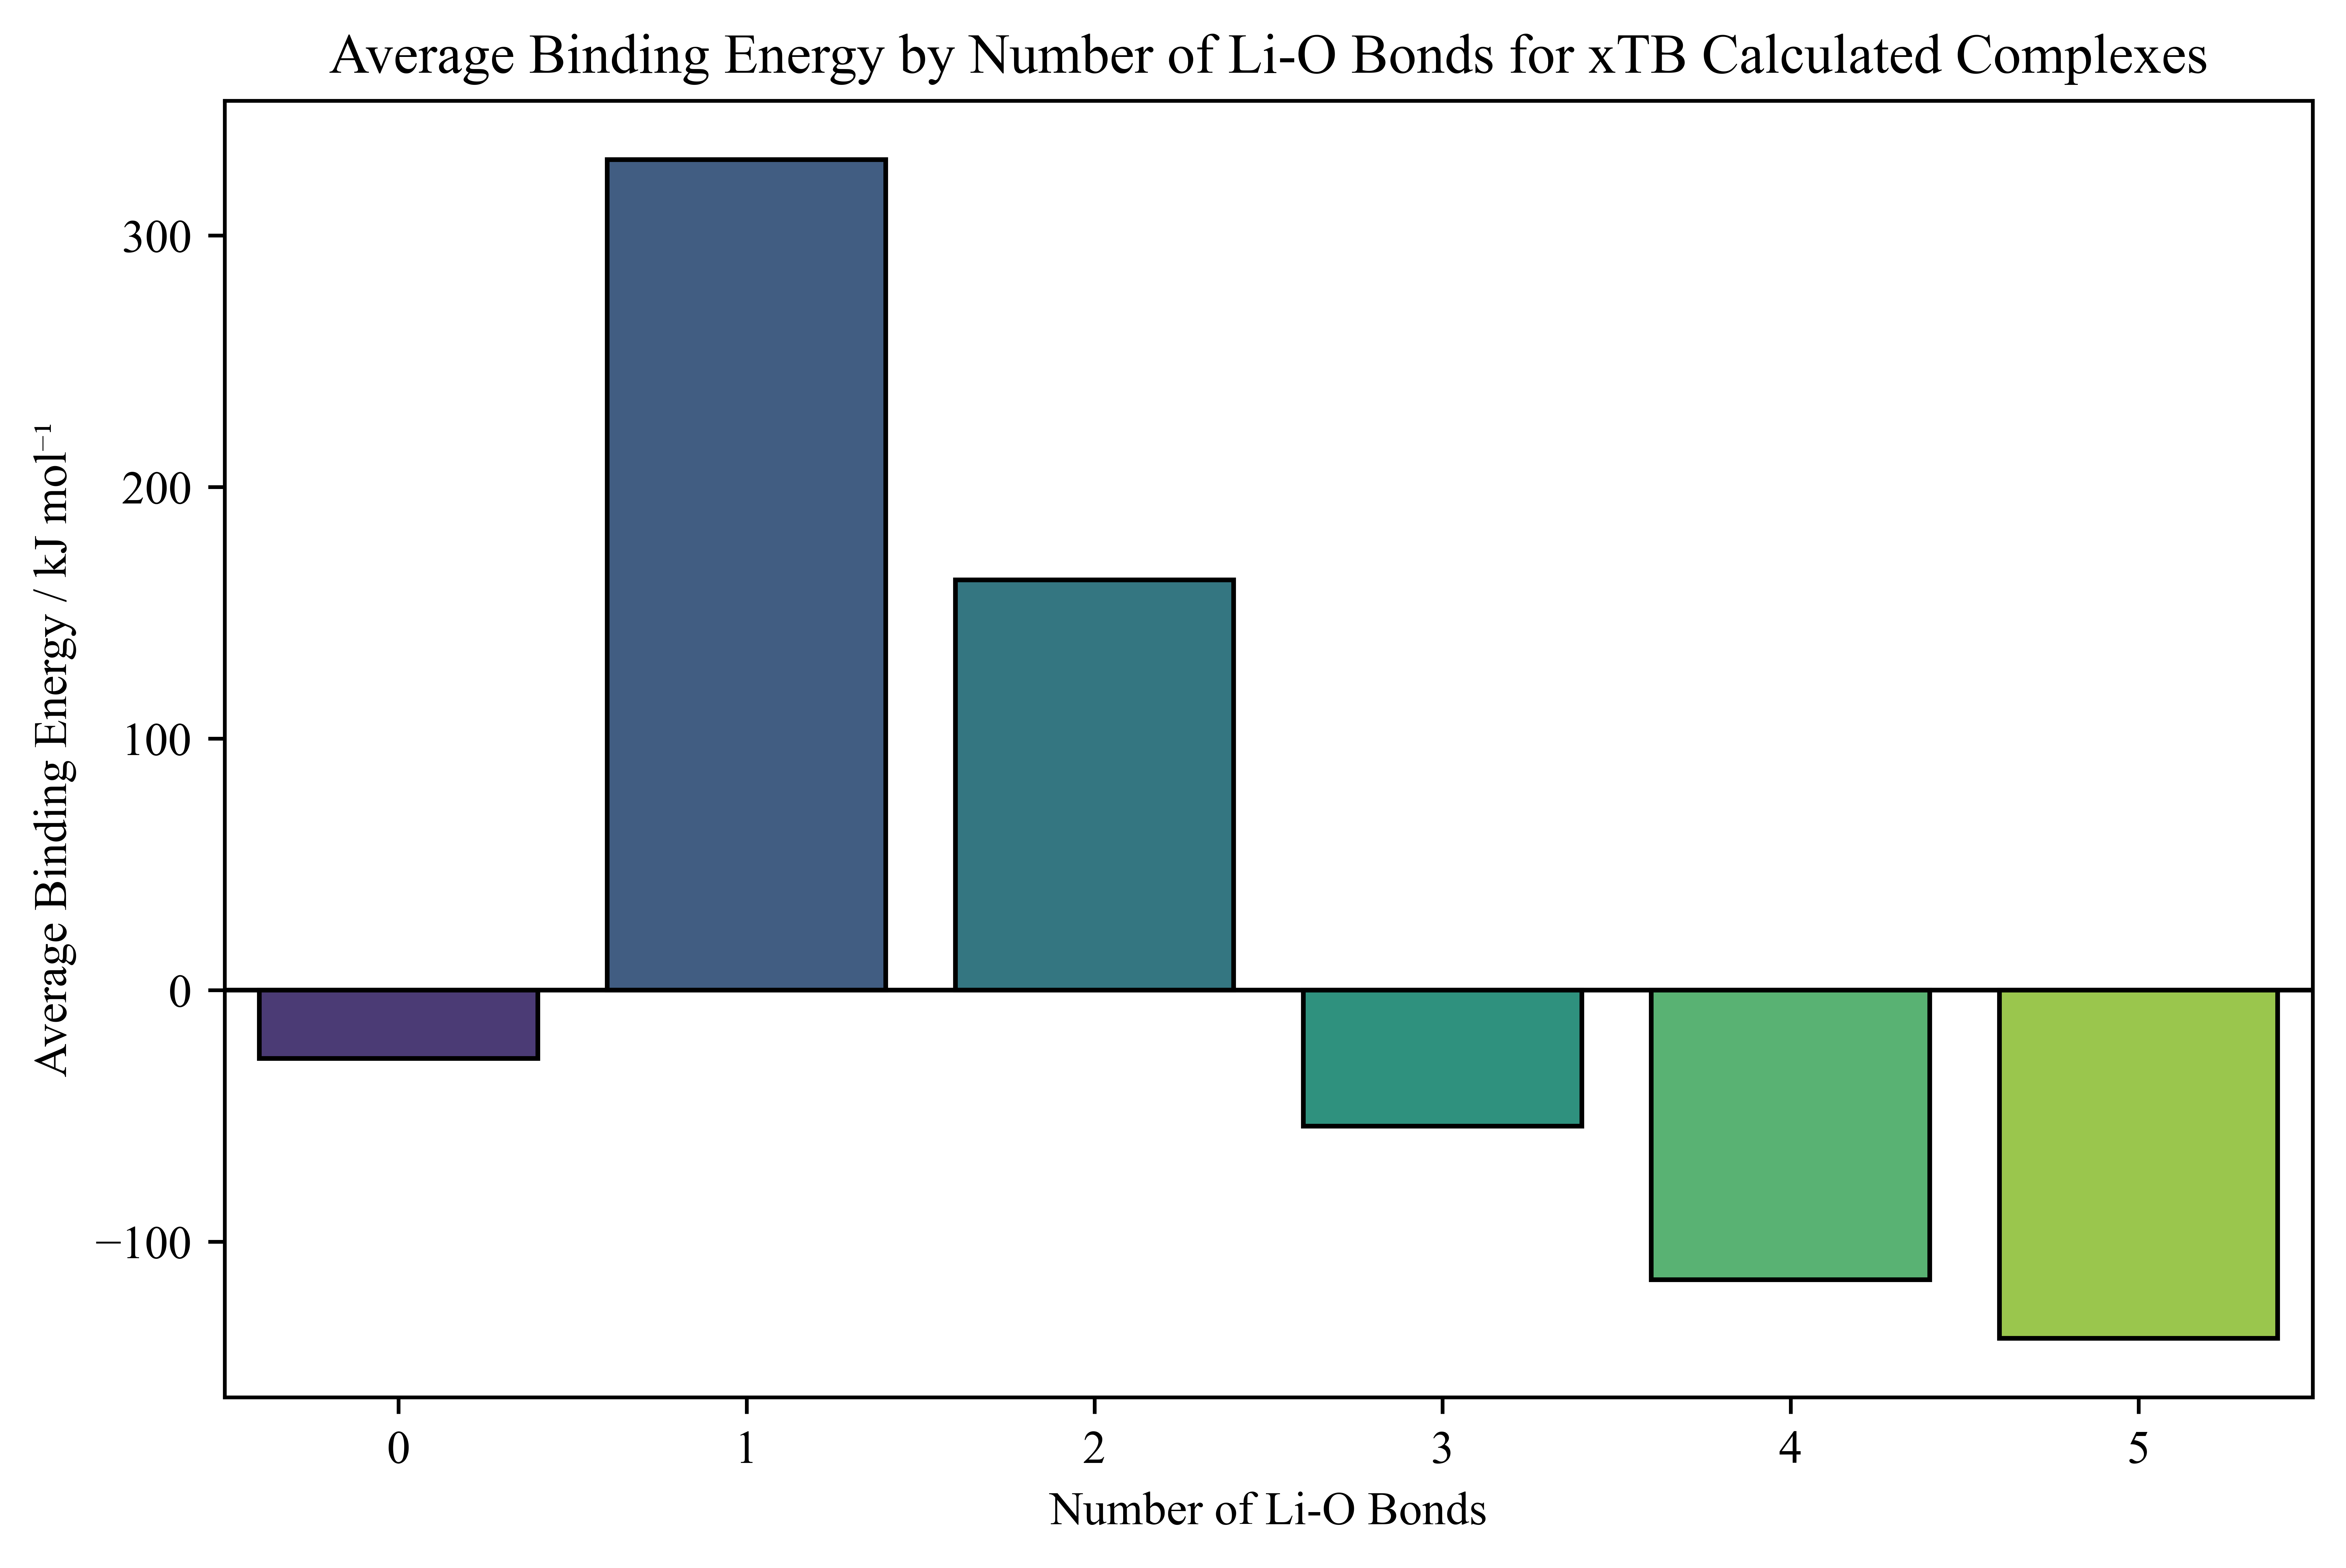

In [34]:
# Compute average binding energy per bond count
avg_energy_bonds = df_edited.groupby('no. of bonds to plot')['gibbs energy change / kJ mol'].mean().reset_index()

# Plot bar chart
plt.figure(figsize=(8, 5), dpi=1000)
sns.barplot(x='no. of bonds to plot', y='gibbs energy change / kJ mol', data=avg_energy_bonds, palette='viridis', edgecolor='black')

# Labels and title
plt.xlabel("Number of Li-O Bonds")
plt.ylabel("Average Binding Energy / kJ mol⁻¹")
plt.title("Average Binding Energy by Number of Li-O Bonds for xTB Calculated Complexes")
plt.rcParams['font.family'] = 'Times New Roman'
plt.axhline(y=0, color='black', linestyle='-', linewidth=1)
plt.savefig("C:/Users/sophi/OneDrive - University of Leeds/Year 4/Sophie Blanch/Report/images/xtb_binding_energy_per_bond_number.png", dpi=1000, bbox_inches='tight')



# Show plot
plt.show()

In [52]:
count = (df_edited_filtered['gibbs energy change / kJ mol'] < -79).sum()
print(f"Total number of tetrahedral complexes within central cluster which exceed threshold: {count}")

threshold_df = df_edited_filtered[df_edited_filtered['gibbs energy change / kJ mol'] < -79]


print(threshold_df.tail(7))

Total number of tetrahedral complexes within central cluster which exceed threshold: 12688
       Code  gibbs energy change / kJ mol  no. of bonds to plot
34535  DDKK                   -315.785834                     4
34536  EWKM                   -316.952755                     4
34540  DEKK                   -326.616058                     4
34541  ERKQ                   -328.485257                     4
34542  VECK                   -329.452450                     4
34543  DKCW                   -343.819464                     4
34545  EKRC                   -435.757812                     4


C:\Users\sophi\AppData\Local\Temp\ipykernel_21964\927883617.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Amino Acid', y='Average Binding Energy', data=avg_energy_df, palette='viridis', edgecolor='black')


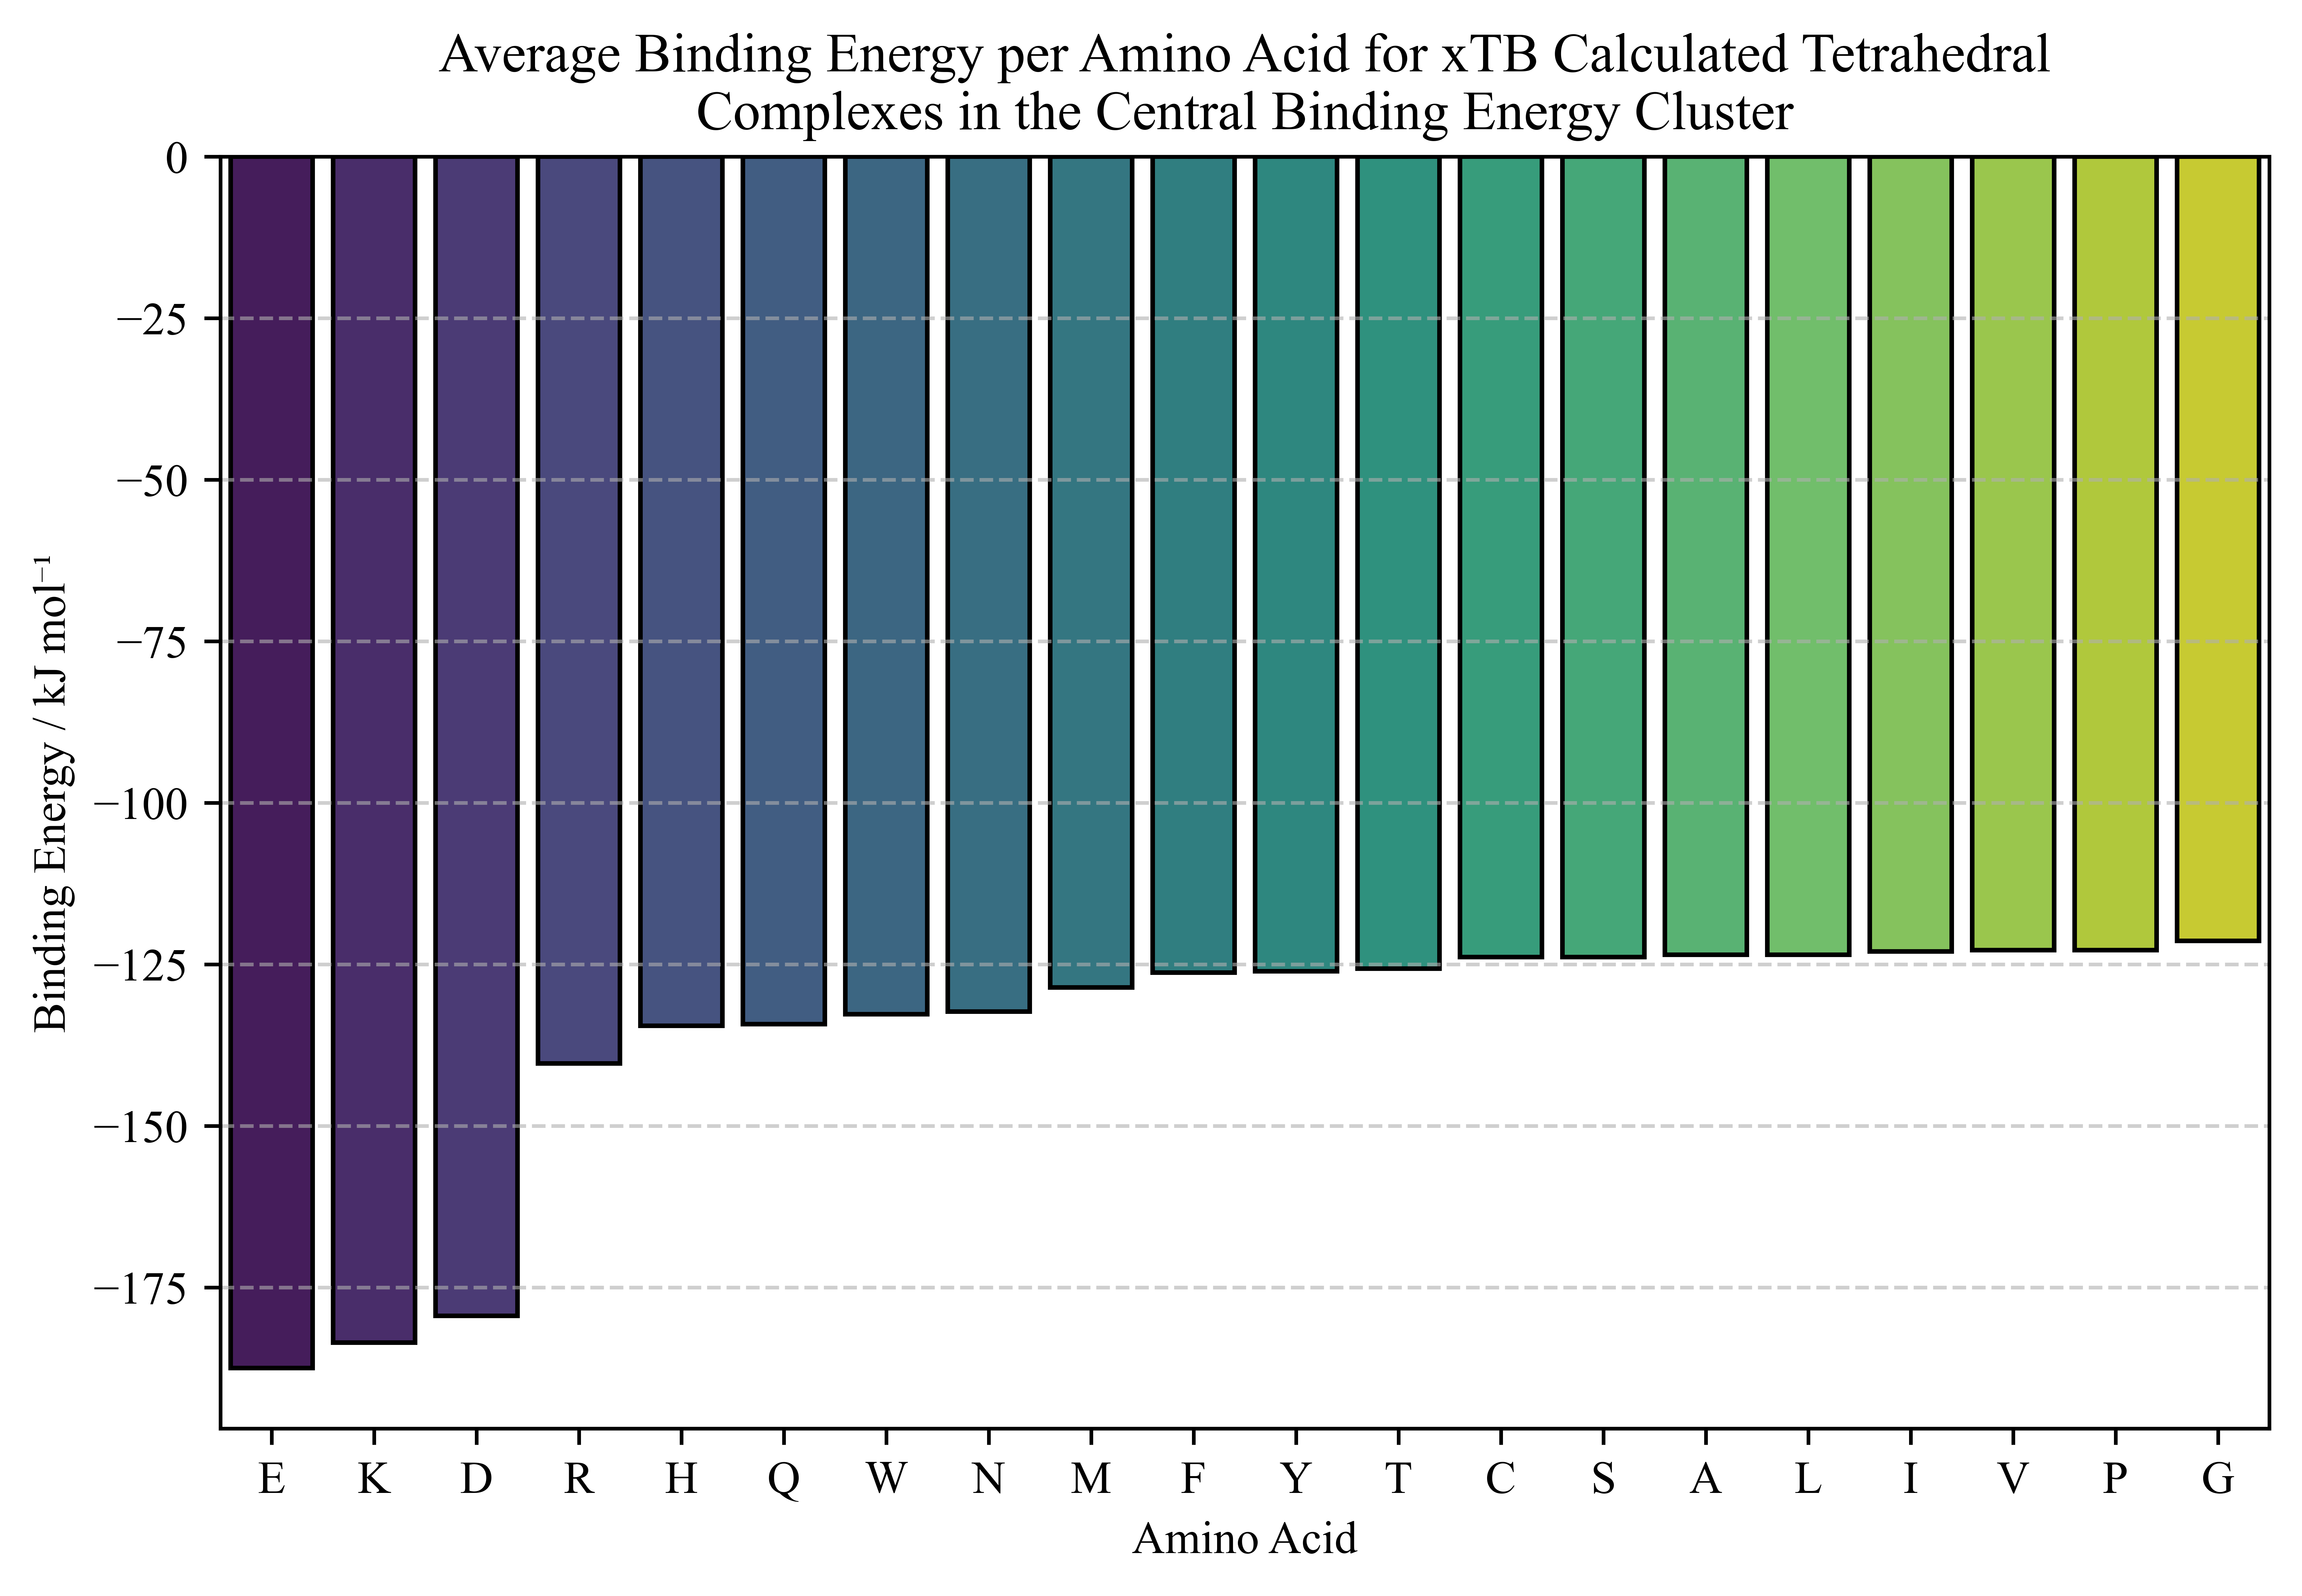

In [47]:
# Dictionary to store summed energies and counts for each amino acid
amino_energy_sum = defaultdict(float)
amino_count = defaultdict(int)

# Process each row in the DataFrame
for _, row in threshold_df.iterrows():
    peptide = row['Code']   
    energy = row['gibbs energy change / kJ mol']   

    # Distribute energy equally among amino acids in the peptide
    for amino in peptide:
        amino_energy_sum[amino] += energy   
        amino_count[amino] += 1   

# Compute average energy per amino acid
amino_avg_energy = {aa: amino_energy_sum[aa] / amino_count[aa] for aa in amino_energy_sum}

# Convert to DataFrame for plotting
avg_energy_df = pd.DataFrame(amino_avg_energy.items(), columns=['Amino Acid', 'Average Binding Energy'])
avg_energy_df = avg_energy_df.sort_values(by='Average Binding Energy')   # Sort

# Plot the bar chart
plt.figure(figsize=(8, 5), dpi=1000)
sns.barplot(x='Amino Acid', y='Average Binding Energy', data=avg_energy_df, palette='viridis', edgecolor='black')

plt.xlabel("Amino Acid")
plt.ylabel("Binding Energy / kJ mol⁻¹")
plt.title("Average Binding Energy per Amino Acid for xTB Calculated Tetrahedral\nComplexes in the Central Binding Energy Cluster")
plt.rcParams['font.family'] = 'Times New Roman'

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.savefig("C:/Users/sophi/OneDrive - University of Leeds/Year 4/Sophie Blanch/Report/images/xtb_avg_binding_per_aa_1_centre_tetrahedral_threshold_hist.png", dpi=1000, bbox_inches='tight')


plt.show()

C:\Users\sophi\AppData\Local\Temp\ipykernel_21964\3942531408.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='no. of bonds to plot', y='gibbs energy change / kJ mol', data=avg_energy_bonds, palette='viridis', edgecolor='black')


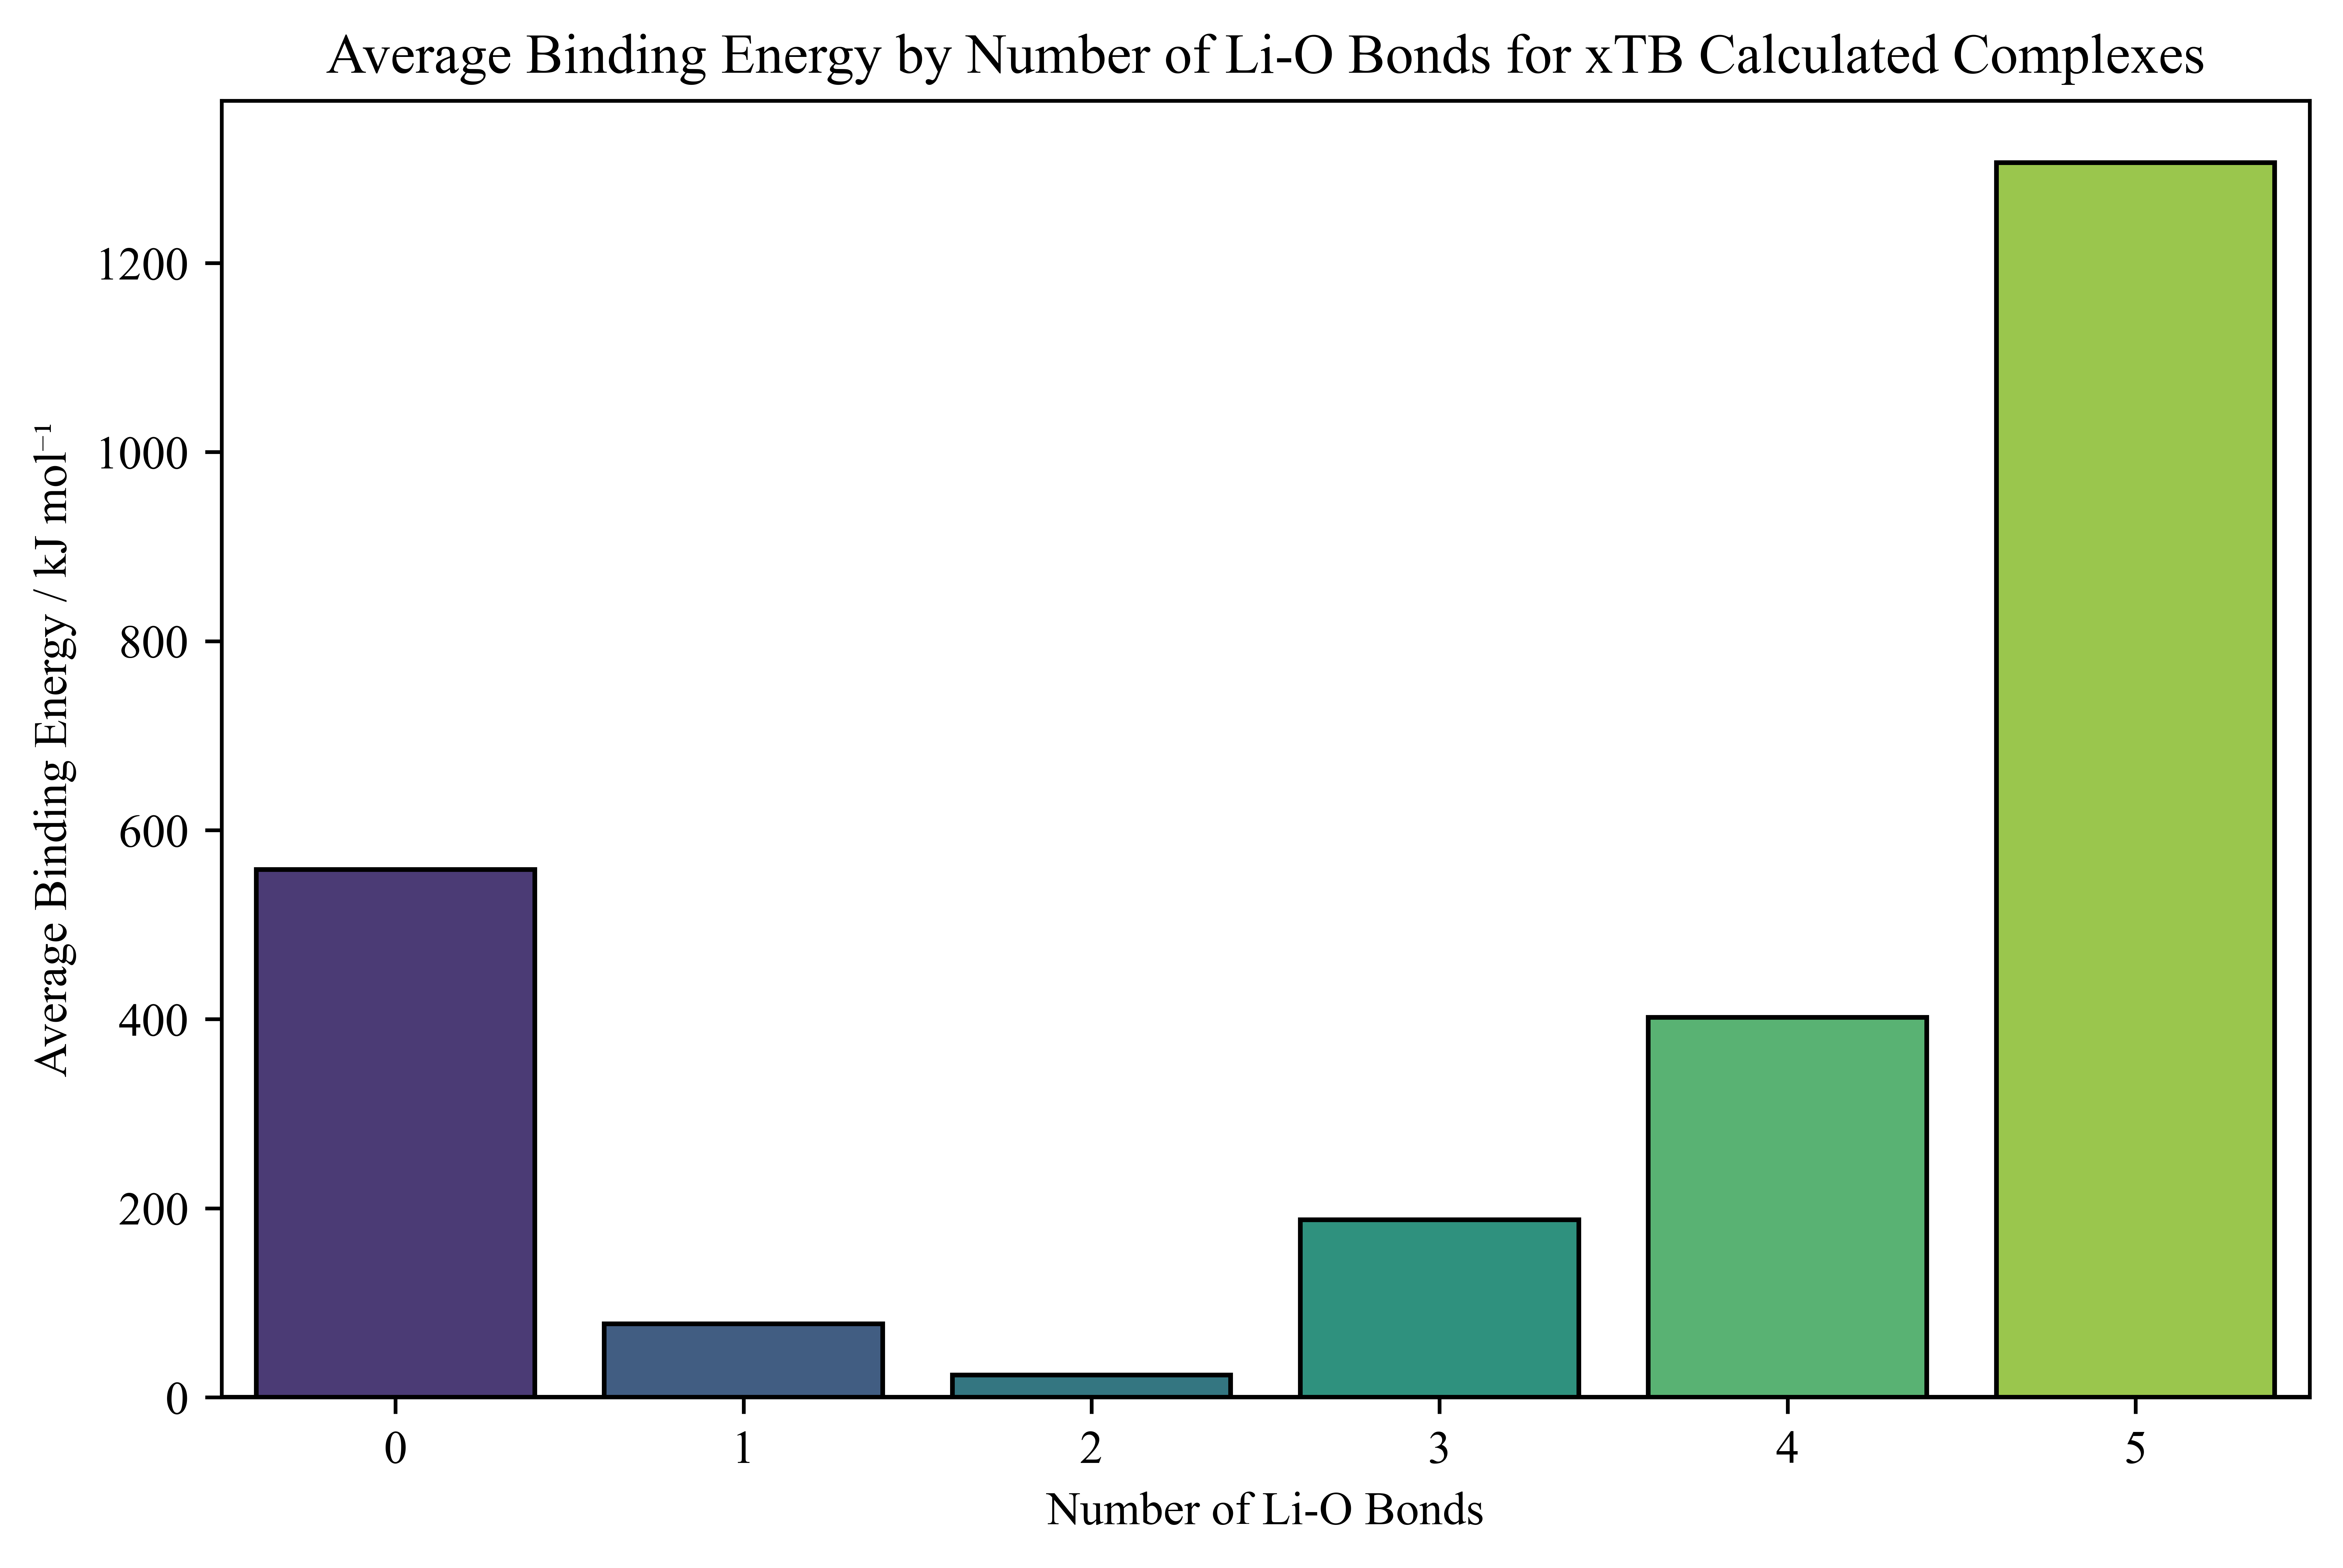

In [36]:
## Bond analysis for the whole dataset
# Compute average binding energy per bond count
avg_energy_bonds = df.groupby('no. of bonds to plot')['gibbs energy change / kJ mol'].mean().reset_index()

# Plot bar chart
plt.figure(figsize=(8, 5), dpi=1000)
sns.barplot(x='no. of bonds to plot', y='gibbs energy change / kJ mol', data=avg_energy_bonds, palette='viridis', edgecolor='black')

# Labels and title
plt.xlabel("Number of Li-O Bonds")
plt.ylabel("Average Binding Energy / kJ mol⁻¹")
plt.title("Average Binding Energy by Number of Li-O Bonds for xTB Calculated Complexes")
plt.rcParams['font.family'] = 'Times New Roman'
plt.axhline(y=0, color='black', linestyle='-', linewidth=1)
# plt.savefig("C:/Users/sophi/OneDrive - University of Leeds/Year 4/Sophie Blanch/Report/images/xtb_binding_energy_per_bond_number.png", dpi=1000, bbox_inches='tight')



# Show plot
plt.show()